## Author: Meivenkatkumar Lakshminarayanan
## USC ID: 2638078100
## Github Userid: meivenka
## Created Time: Mar 3, 2023

##### Packages Section

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn
from scipy.io import arff
import pandas as pd
import numpy as np
import tabulate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import f1_score, precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from numpy import mean
from numpy import std
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

sklearn.exceptions.ConvergenceWarning('ignore')

### Q1.Time Series Classification Part 1: Feature Creation/Extraction

#### (a) Download the AReM data from dropbox

#### (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [2]:
testData = []
trainData = []

# Loading Test Data
testb1_1 = pd.read_csv("../data/bending1/dataset1.csv",comment='#', header=None)
testb1_2 = pd.read_csv("../data/bending1/dataset2.csv",comment='#', header=None)
testData.append(testb1_1)
testData.append(testb1_2)

testb2_1 = pd.read_csv("../data/bending2/dataset1.csv",comment='#', header=None)
testb2_2 = pd.read_csv("../data/bending2/dataset2.csv",comment='#', header=None)
testData.append(testb2_1)
testData.append(testb2_2)

testc_1 = pd.read_csv("../data/cycling/dataset1.csv",comment='#', header=None)
testc_2 = pd.read_csv("../data/cycling/dataset2.csv",comment='#', header=None)
testc_3 = pd.read_csv("../data/cycling/dataset3.csv",comment='#', header=None)
testData.append(testc_1)
testData.append(testc_2)
testData.append(testc_3)

testl_1 = pd.read_csv("../data/lying/dataset1.csv",comment='#', header=None)
testl_2 = pd.read_csv("../data/lying/dataset2.csv",comment='#', header=None)
testl_3 = pd.read_csv("../data/lying/dataset3.csv",comment='#', header=None)
testData.append(testl_1)
testData.append(testl_2)
testData.append(testl_3)

testsi_1 = pd.read_csv("../data/sitting/dataset1.csv",comment='#', header=None)
testsi_2 = pd.read_csv("../data/sitting/dataset2.csv",comment='#', header=None)
testsi_3 = pd.read_csv("../data/sitting/dataset3.csv",comment='#', header=None)
testData.append(testsi_1)
testData.append(testsi_2)
testData.append(testsi_3)

testst_1 = pd.read_csv("../data/standing/dataset1.csv",comment='#', header=None)
testst_2 = pd.read_csv("../data/standing/dataset2.csv",comment='#', header=None)
testst_3 = pd.read_csv("../data/standing/dataset3.csv",comment='#', header=None)
testData.append(testst_1)
testData.append(testst_2)
testData.append(testst_3)

testw_1 = pd.read_csv("../data/walking/dataset1.csv",comment='#', header=None)
testw_2 = pd.read_csv("../data/walking/dataset2.csv",comment='#', header=None)
testw_3 = pd.read_csv("../data/walking/dataset3.csv",comment='#', header=None)
testData.append(testw_1)
testData.append(testw_2)
testData.append(testw_3)

# Loading Train Data
trainb1_3 = pd.read_csv("../data/bending1/dataset3.csv",comment='#', header=None)
trainb1_4 = pd.read_csv("../data/bending1/dataset4.csv",comment='#', header=None)
trainb1_5 = pd.read_csv("../data/bending1/dataset5.csv",comment='#', header=None)
trainb1_6 = pd.read_csv("../data/bending1/dataset6.csv",comment='#', header=None)
trainb1_7 = pd.read_csv("../data/bending1/dataset7.csv",comment='#', header=None)
trainData.append(trainb1_3)
trainData.append(trainb1_4)
trainData.append(trainb1_5)
trainData.append(trainb1_6)
trainData.append(trainb1_7)

trainb2_3 = pd.read_csv("../data/bending2/dataset3.csv",comment='#', header=None)
trainb2_4 = pd.read_csv("../data/bending2/dataset4.csv",comment='#', header=None, delim_whitespace=True)
trainb2_5 = pd.read_csv("../data/bending2/dataset5.csv",comment='#', header=None)
trainb2_6 = pd.read_csv("../data/bending2/dataset6.csv",comment='#', header=None)
trainData.append(trainb2_3)
trainData.append(trainb2_4)
trainData.append(trainb2_5)
trainData.append(trainb2_6)

trainc_4 = pd.read_csv("../data/cycling/dataset4.csv",comment='#', header=None)
trainc_5 = pd.read_csv("../data/cycling/dataset5.csv",comment='#', header=None)
trainc_6 = pd.read_csv("../data/cycling/dataset6.csv",comment='#', header=None)
trainc_7 = pd.read_csv("../data/cycling/dataset7.csv",comment='#', header=None)
trainc_8 = pd.read_csv("../data/cycling/dataset8.csv",comment='#', header=None)
trainc_9 = pd.read_csv("../data/cycling/dataset9.csv",comment='#', header=None)
trainc_10 = pd.read_csv("../data/cycling/dataset10.csv",comment='#', header=None)
trainc_11 = pd.read_csv("../data/cycling/dataset11.csv",comment='#', header=None)
trainc_12 = pd.read_csv("../data/cycling/dataset12.csv",comment='#', header=None)
trainc_13 = pd.read_csv("../data/cycling/dataset13.csv",comment='#', header=None)
trainc_14 = pd.read_csv("../data/cycling/dataset14.csv",comment='#', header=None)
trainc_15 = pd.read_csv("../data/cycling/dataset15.csv",comment='#', header=None)
trainData.append(trainc_4)
trainData.append(trainc_5)
trainData.append(trainc_6)
trainData.append(trainc_7)
trainData.append(trainc_8)
trainData.append(trainc_9)
trainData.append(trainc_10)
trainData.append(trainc_11)
trainData.append(trainc_12)
trainData.append(trainc_13)
trainData.append(trainc_14)
trainData.append(trainc_15)

trainl_4 = pd.read_csv("../data/lying/dataset4.csv",comment='#', header=None)
trainl_5 = pd.read_csv("../data/lying/dataset5.csv",comment='#', header=None)
trainl_6 = pd.read_csv("../data/lying/dataset6.csv",comment='#', header=None)
trainl_7 = pd.read_csv("../data/lying/dataset7.csv",comment='#', header=None)
trainl_8 = pd.read_csv("../data/lying/dataset8.csv",comment='#', header=None)
trainl_9 = pd.read_csv("../data/lying/dataset9.csv",comment='#', header=None)
trainl_10 = pd.read_csv("../data/lying/dataset10.csv",comment='#', header=None)
trainl_11 = pd.read_csv("../data/lying/dataset11.csv",comment='#', header=None)
trainl_12 = pd.read_csv("../data/lying/dataset12.csv",comment='#', header=None)
trainl_13 = pd.read_csv("../data/lying/dataset13.csv",comment='#', header=None)
trainl_14 = pd.read_csv("../data/lying/dataset14.csv",comment='#', header=None)
trainl_15 = pd.read_csv("../data/lying/dataset15.csv",comment='#', header=None)
trainData.append(trainl_4)
trainData.append(trainl_5)
trainData.append(trainl_6)
trainData.append(trainl_7)
trainData.append(trainl_8)
trainData.append(trainl_9)
trainData.append(trainl_10)
trainData.append(trainl_11)
trainData.append(trainl_12)
trainData.append(trainl_13)
trainData.append(trainl_14)
trainData.append(trainl_15)

trainsi_4 = pd.read_csv("../data/sitting/dataset4.csv",comment='#', header=None)
trainsi_5 = pd.read_csv("../data/sitting/dataset5.csv",comment='#', header=None)
trainsi_6 = pd.read_csv("../data/sitting/dataset6.csv",comment='#', header=None)
trainsi_7 = pd.read_csv("../data/sitting/dataset7.csv",comment='#', header=None)
trainsi_8 = pd.read_csv("../data/sitting/dataset8.csv",comment='#', header=None)
trainsi_9 = pd.read_csv("../data/sitting/dataset9.csv",comment='#', header=None)
trainsi_10 = pd.read_csv("../data/sitting/dataset10.csv",comment='#', header=None)
trainsi_11 = pd.read_csv("../data/sitting/dataset11.csv",comment='#', header=None)
trainsi_12 = pd.read_csv("../data/sitting/dataset12.csv",comment='#', header=None)
trainsi_13 = pd.read_csv("../data/sitting/dataset13.csv",comment='#', header=None)
trainsi_14 = pd.read_csv("../data/sitting/dataset14.csv",comment='#', header=None)
trainsi_15 = pd.read_csv("../data/sitting/dataset15.csv",comment='#', header=None)
trainData.append(trainsi_4)
trainData.append(trainsi_5)
trainData.append(trainsi_6)
trainData.append(trainsi_7)
trainData.append(trainsi_8)
trainData.append(trainsi_9)
trainData.append(trainsi_10)
trainData.append(trainsi_11)
trainData.append(trainsi_12)
trainData.append(trainsi_13)
trainData.append(trainsi_14)
trainData.append(trainsi_15)

trainst_4 = pd.read_csv("../data/standing/dataset4.csv",comment='#', header=None)
trainst_5 = pd.read_csv("../data/standing/dataset5.csv",comment='#', header=None)
trainst_6 = pd.read_csv("../data/standing/dataset6.csv",comment='#', header=None)
trainst_7 = pd.read_csv("../data/standing/dataset7.csv",comment='#', header=None)
trainst_8 = pd.read_csv("../data/standing/dataset8.csv",comment='#', header=None)
trainst_9 = pd.read_csv("../data/standing/dataset9.csv",comment='#', header=None)
trainst_10 = pd.read_csv("../data/standing/dataset10.csv",comment='#', header=None)
trainst_11 = pd.read_csv("../data/standing/dataset11.csv",comment='#', header=None)
trainst_12 = pd.read_csv("../data/standing/dataset12.csv",comment='#', header=None)
trainst_13 = pd.read_csv("../data/standing/dataset13.csv",comment='#', header=None)
trainst_14 = pd.read_csv("../data/standing/dataset14.csv",comment='#', header=None)
trainst_15 = pd.read_csv("../data/standing/dataset15.csv",comment='#', header=None)
trainData.append(trainst_4)
trainData.append(trainst_5)
trainData.append(trainst_6)
trainData.append(trainst_7)
trainData.append(trainst_8)
trainData.append(trainst_9)
trainData.append(trainst_10)
trainData.append(trainst_11)
trainData.append(trainst_12)
trainData.append(trainst_13)
trainData.append(trainst_14)
trainData.append(trainst_15)

trainw_4 = pd.read_csv("../data/walking/dataset4.csv",comment='#', header=None)
trainw_5 = pd.read_csv("../data/walking/dataset5.csv",comment='#', header=None)
trainw_6 = pd.read_csv("../data/walking/dataset6.csv",comment='#', header=None)
trainw_7 = pd.read_csv("../data/walking/dataset7.csv",comment='#', header=None)
trainw_8 = pd.read_csv("../data/walking/dataset8.csv",comment='#', header=None)
trainw_9 = pd.read_csv("../data/walking/dataset9.csv",comment='#', header=None)
trainw_10 = pd.read_csv("../data/walking/dataset10.csv",comment='#', header=None)
trainw_11 = pd.read_csv("../data/walking/dataset11.csv",comment='#', header=None)
trainw_12 = pd.read_csv("../data/walking/dataset12.csv",comment='#', header=None)
trainw_13 = pd.read_csv("../data/walking/dataset13.csv",comment='#', header=None)
trainw_14 = pd.read_csv("../data/walking/dataset14.csv",comment='#', header=None)
trainw_15 = pd.read_csv("../data/walking/dataset15.csv",comment='#', header=None)
trainData.append(trainw_4)
trainData.append(trainw_5)
trainData.append(trainw_6)
trainData.append(trainw_7)
trainData.append(trainw_8)
trainData.append(trainw_9)
trainData.append(trainw_10)
trainData.append(trainw_11)
trainData.append(trainw_12)
trainData.append(trainw_13)
trainData.append(trainw_14)
trainData.append(trainw_15)


# HOMEWORK 3 ANALYSIS 

analysisData = []

# Loading All Data
analysisData.append(testb1_1)
analysisData.append(testb1_2)
analysisData.append(trainb1_3)
analysisData.append(trainb1_4)
analysisData.append(trainb1_5)
analysisData.append(trainb1_6)
analysisData.append(trainb1_7)

analysisData.append(testb2_1)
analysisData.append(testb2_2)
analysisData.append(trainb2_3)
analysisData.append(trainb2_4)
analysisData.append(trainb2_5)
analysisData.append(trainb2_6)

analysisData.append(testc_1)
analysisData.append(testc_2)
analysisData.append(testc_3)
analysisData.append(trainc_4)
analysisData.append(trainc_5)
analysisData.append(trainc_6)
analysisData.append(trainc_7)
analysisData.append(trainc_8)
analysisData.append(trainc_9)
analysisData.append(trainc_10)
analysisData.append(trainc_11)
analysisData.append(trainc_12)
analysisData.append(trainc_13)
analysisData.append(trainc_14)
analysisData.append(trainc_15)

analysisData.append(testl_1)
analysisData.append(testl_2)
analysisData.append(testl_3)
analysisData.append(trainl_4)
analysisData.append(trainl_5)
analysisData.append(trainl_6)
analysisData.append(trainl_7)
analysisData.append(trainl_8)
analysisData.append(trainl_9)
analysisData.append(trainl_10)
analysisData.append(trainl_11)
analysisData.append(trainl_12)
analysisData.append(trainl_13)
analysisData.append(trainl_14)
analysisData.append(trainl_15)

analysisData.append(testsi_1)
analysisData.append(testsi_2)
analysisData.append(testsi_3)
analysisData.append(trainsi_4)
analysisData.append(trainsi_5)
analysisData.append(trainsi_6)
analysisData.append(trainsi_7)
analysisData.append(trainsi_8)
analysisData.append(trainsi_9)
analysisData.append(trainsi_10)
analysisData.append(trainsi_11)
analysisData.append(trainsi_12)
analysisData.append(trainsi_13)
analysisData.append(trainsi_14)
analysisData.append(trainsi_15)

analysisData.append(testst_1)
analysisData.append(testst_2)
analysisData.append(testst_3)
analysisData.append(trainst_4)
analysisData.append(trainst_5)
analysisData.append(trainst_6)
analysisData.append(trainst_7)
analysisData.append(trainst_8)
analysisData.append(trainst_9)
analysisData.append(trainst_10)
analysisData.append(trainst_11)
analysisData.append(trainst_12)
analysisData.append(trainst_13)
analysisData.append(trainst_14)
analysisData.append(trainst_15)

analysisData.append(testw_1)
analysisData.append(testw_2)
analysisData.append(testw_3)
analysisData.append(trainw_4)
analysisData.append(trainw_5)
analysisData.append(trainw_6)
analysisData.append(trainw_7)
analysisData.append(trainw_8)
analysisData.append(trainw_9)
analysisData.append(trainw_10)
analysisData.append(trainw_11)
analysisData.append(trainw_12)
analysisData.append(trainw_13)
analysisData.append(trainw_14)
analysisData.append(trainw_15)

#### (c) Feature Extraction：Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features

#### ci. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

##### -> AutoCorrelation: meauure of correlation between the time series values at different lags
##### -> Kurtosis: measure of the sharpness of peak of the time series
##### -> Root Mean Square: measure of amplitude/magnitude
##### -> Skewedness: measure of asymmetry in data
###### The following are used in this homework
##### -> Minimum
##### -> Maximum
##### -> Mean
##### -> Median
##### -> Standard Deviation
##### -> 1st Quartile
##### -> 3rd Quartile

#### ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation,  rst quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly. $^2$ Your new dataset will look like this:

#### where, for example, 1st quart6, means the  rst quartile of the sixth time series in each of the 88 instances.

In [3]:
i = 1
columnsName = ['Instance#', 'min1', 'max1', 'mean1', 'median1', 'std1','1stQ1', '3rdQ1', 'min2', 'max2', 'mean2', 'median2', 'std2', '1stQ2', '3rdQ2', 'min3', 'max3', 'mean3', 'median3', 'std3', '1stQ3', '3rdQ3', 'min4', 'max4', 'mean4', 'median4', 'std4', '1stQ4', '3rdQ4', 'min5', 'max5', 'mean5', 'median5', 'std5', '1stQ5', '3rdQ5', 'min6', 'max6', 'mean6', 'median6', 'std6', '1stQ6', '3rdQ6']
Tabledata = []
bootstrapSample = []
for dat in analysisData:

    bootstrapSample.append([dat[1].min(), dat[1].max(), dat[1].mean(), dat[1].median(), dat[1].std(), dat[1].describe()[4], dat[1].describe()[6], 
                     dat[2].min(), dat[2].max(), dat[2].mean(), dat[2].median(), dat[2].describe()[4], dat[2].std(), dat[2].describe()[6],
                     dat[3].min(), dat[3].max(), dat[3].mean(), dat[3].median(), dat[3].describe()[4], dat[3].std(), dat[3].describe()[6],
                     dat[4].min(), dat[4].max(), dat[4].mean(), dat[4].median(), dat[4].describe()[4], dat[4].std(), dat[4].describe()[6],
                     dat[5].min(), dat[5].max(), dat[5].mean(), dat[5].median(), dat[5].describe()[4], dat[5].std(), dat[5].describe()[6],
                     dat[6].min(), dat[6].max(), dat[6].mean(), dat[6].median(), dat[6].describe()[4], dat[6].std(), dat[6].describe()[6]])
    Tabledata.append(["Instance#" + str(i), dat[1].min(), dat[1].max(), dat[1].mean(), dat[1].median(), dat[1].std(), dat[1].describe()[4], dat[1].describe()[6], 
                     dat[2].min(), dat[2].max(), dat[2].mean(), dat[2].median(), dat[2].describe()[4], dat[2].std(), dat[2].describe()[6],
                     dat[3].min(), dat[3].max(), dat[3].mean(), dat[3].median(), dat[3].describe()[4], dat[3].std(), dat[3].describe()[6],
                     dat[4].min(), dat[4].max(), dat[4].mean(), dat[4].median(), dat[4].describe()[4], dat[4].std(), dat[4].describe()[6],
                     dat[5].min(), dat[5].max(), dat[5].mean(), dat[5].median(), dat[5].describe()[4], dat[5].std(), dat[5].describe()[6],
                     dat[6].min(), dat[6].max(), dat[6].mean(), dat[6].median(), dat[6].describe()[4], dat[6].std(), dat[6].describe()[6]])
    i+=1

print(pd.DataFrame(Tabledata, columns=columnsName))

      Instance#   min1   max1      mean1  median1      std1  1stQ1    3rdQ1  \
0    Instance#1  37.25  45.00  40.624792    40.50  1.476967  39.25  42.0000   
1    Instance#2  38.00  45.67  42.812812    42.50  1.435550  42.00  43.6700   
2    Instance#3  35.00  47.40  43.954500    44.33  1.558835  43.00  45.0000   
3    Instance#4  33.00  47.75  42.179812    43.50  3.670666  39.15  45.0000   
4    Instance#5  33.00  45.75  41.678063    41.75  2.243490  41.33  42.7500   
..          ...    ...    ...        ...      ...       ...    ...      ...   
83  Instance#84  19.50  45.33  33.586875    34.25  4.650935  30.25  37.0000   
84  Instance#85  19.75  45.50  34.322750    35.25  4.752477  31.00  38.0000   
85  Instance#86  19.50  46.00  34.546229    35.25  4.842294  31.25  37.8125   
86  Instance#87  23.50  46.25  34.873229    35.25  4.531720  31.75  38.2500   
87  Instance#88  19.25  44.00  34.473188    35.00  4.796705  31.25  38.0000   

    min2   max2  ...     std5     1stQ5  3rdQ5  min

#### iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python's bootstrapped or any other method to build a 90% bootsrap con dence interval for the standard deviation of each feature.

In [4]:
bootstrapdf = pd.DataFrame(Tabledata, columns=columnsName)
print(bootstrapdf.describe())

i = 0
for col in columnsName:
    if i == 0:
        i =1
        continue
    print("Confidence Interval of: " + str(col))
    print(bs.bootstrap(bootstrapdf[col].values, stat_func=bs_stats.std, alpha=0.1))



            min1       max1      mean1    median1       std1     1stQ1  \
count  88.000000  88.000000  88.000000  88.000000  88.000000  88.00000   
mean   29.036705  45.473068  38.917357  38.856705   2.988893  37.01983   
std     9.569975   4.394362   5.335718   5.440054   1.772153   6.15359   
min     0.000000  30.000000  24.562958  24.250000   0.032038  23.18750   
25%    21.875000  44.585000  34.845755  35.447500   1.468289  31.62750   
50%    28.625000  45.750000  39.433792  39.415000   3.212700  39.20000   
75%    36.270000  47.750000  43.013250  43.250000   4.552490  42.00000   
max    48.000000  56.250000  48.004167  48.000000   7.684146  48.00000   

           3rdQ1  min2       max2      mean2  ...       std5      1stQ5  \
count  88.000000  88.0  88.000000  88.000000  ...  88.000000  88.000000   
mean   41.197216   0.0   6.290114   1.459119  ...  13.826761   3.537752   
std     5.138925   0.0   5.062729   1.574164  ...   6.096465   1.024898   
min    26.500000   0.0   0.430000

### iv. Use your judgement to select the three most important time-domain features

#### -> Mean: shows the central tendency of the data. shows the positive or negative trend in time series
#### -> Standard Deviation: shows the amount of dispersion in the data. shows the outliers and volatility of a data
#### -> 3rdQuartile: 75% data range

### Q2. ISLR 3.7.4

### I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + e$.

#### a). Suppose that the true relationship between X and Y is linear, i.e. $Y = \beta_0 + \beta_1 X + e$. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

#### Cubic regression would have lower RSS since there is a chance of overfitting to the data to bring the RSS very low with X^2, X^3 terms.  
#### But Linear regression does not overfit, would have lower testing error than cubic regression. 


#### b). Answer (a) using test rather than training RSS.

#### Linear regression would have lower testing RSS for the same reason above. It does not overfit to the training data.

#### c). Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

#### Cubic regression would have lower RSS than linear regression in Training error. 
#### Reason: cubic regression overfits the training data

#### d). Answer (c) using test rather than training RSS.

#### Not enough information given. 
#### If the model is closer to linear, Linear regression's testing RSS will be lower
#### If the model is closer to cubic, Cubic regression's testing RSS will be lower

## Binary and Multiclass Classification

##### a) i. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance

##### I have hard-coded the split for i. and ii. But for iii). I have set in a loop to do it l = {1...20}
##### Helped me to understand the features transformations better

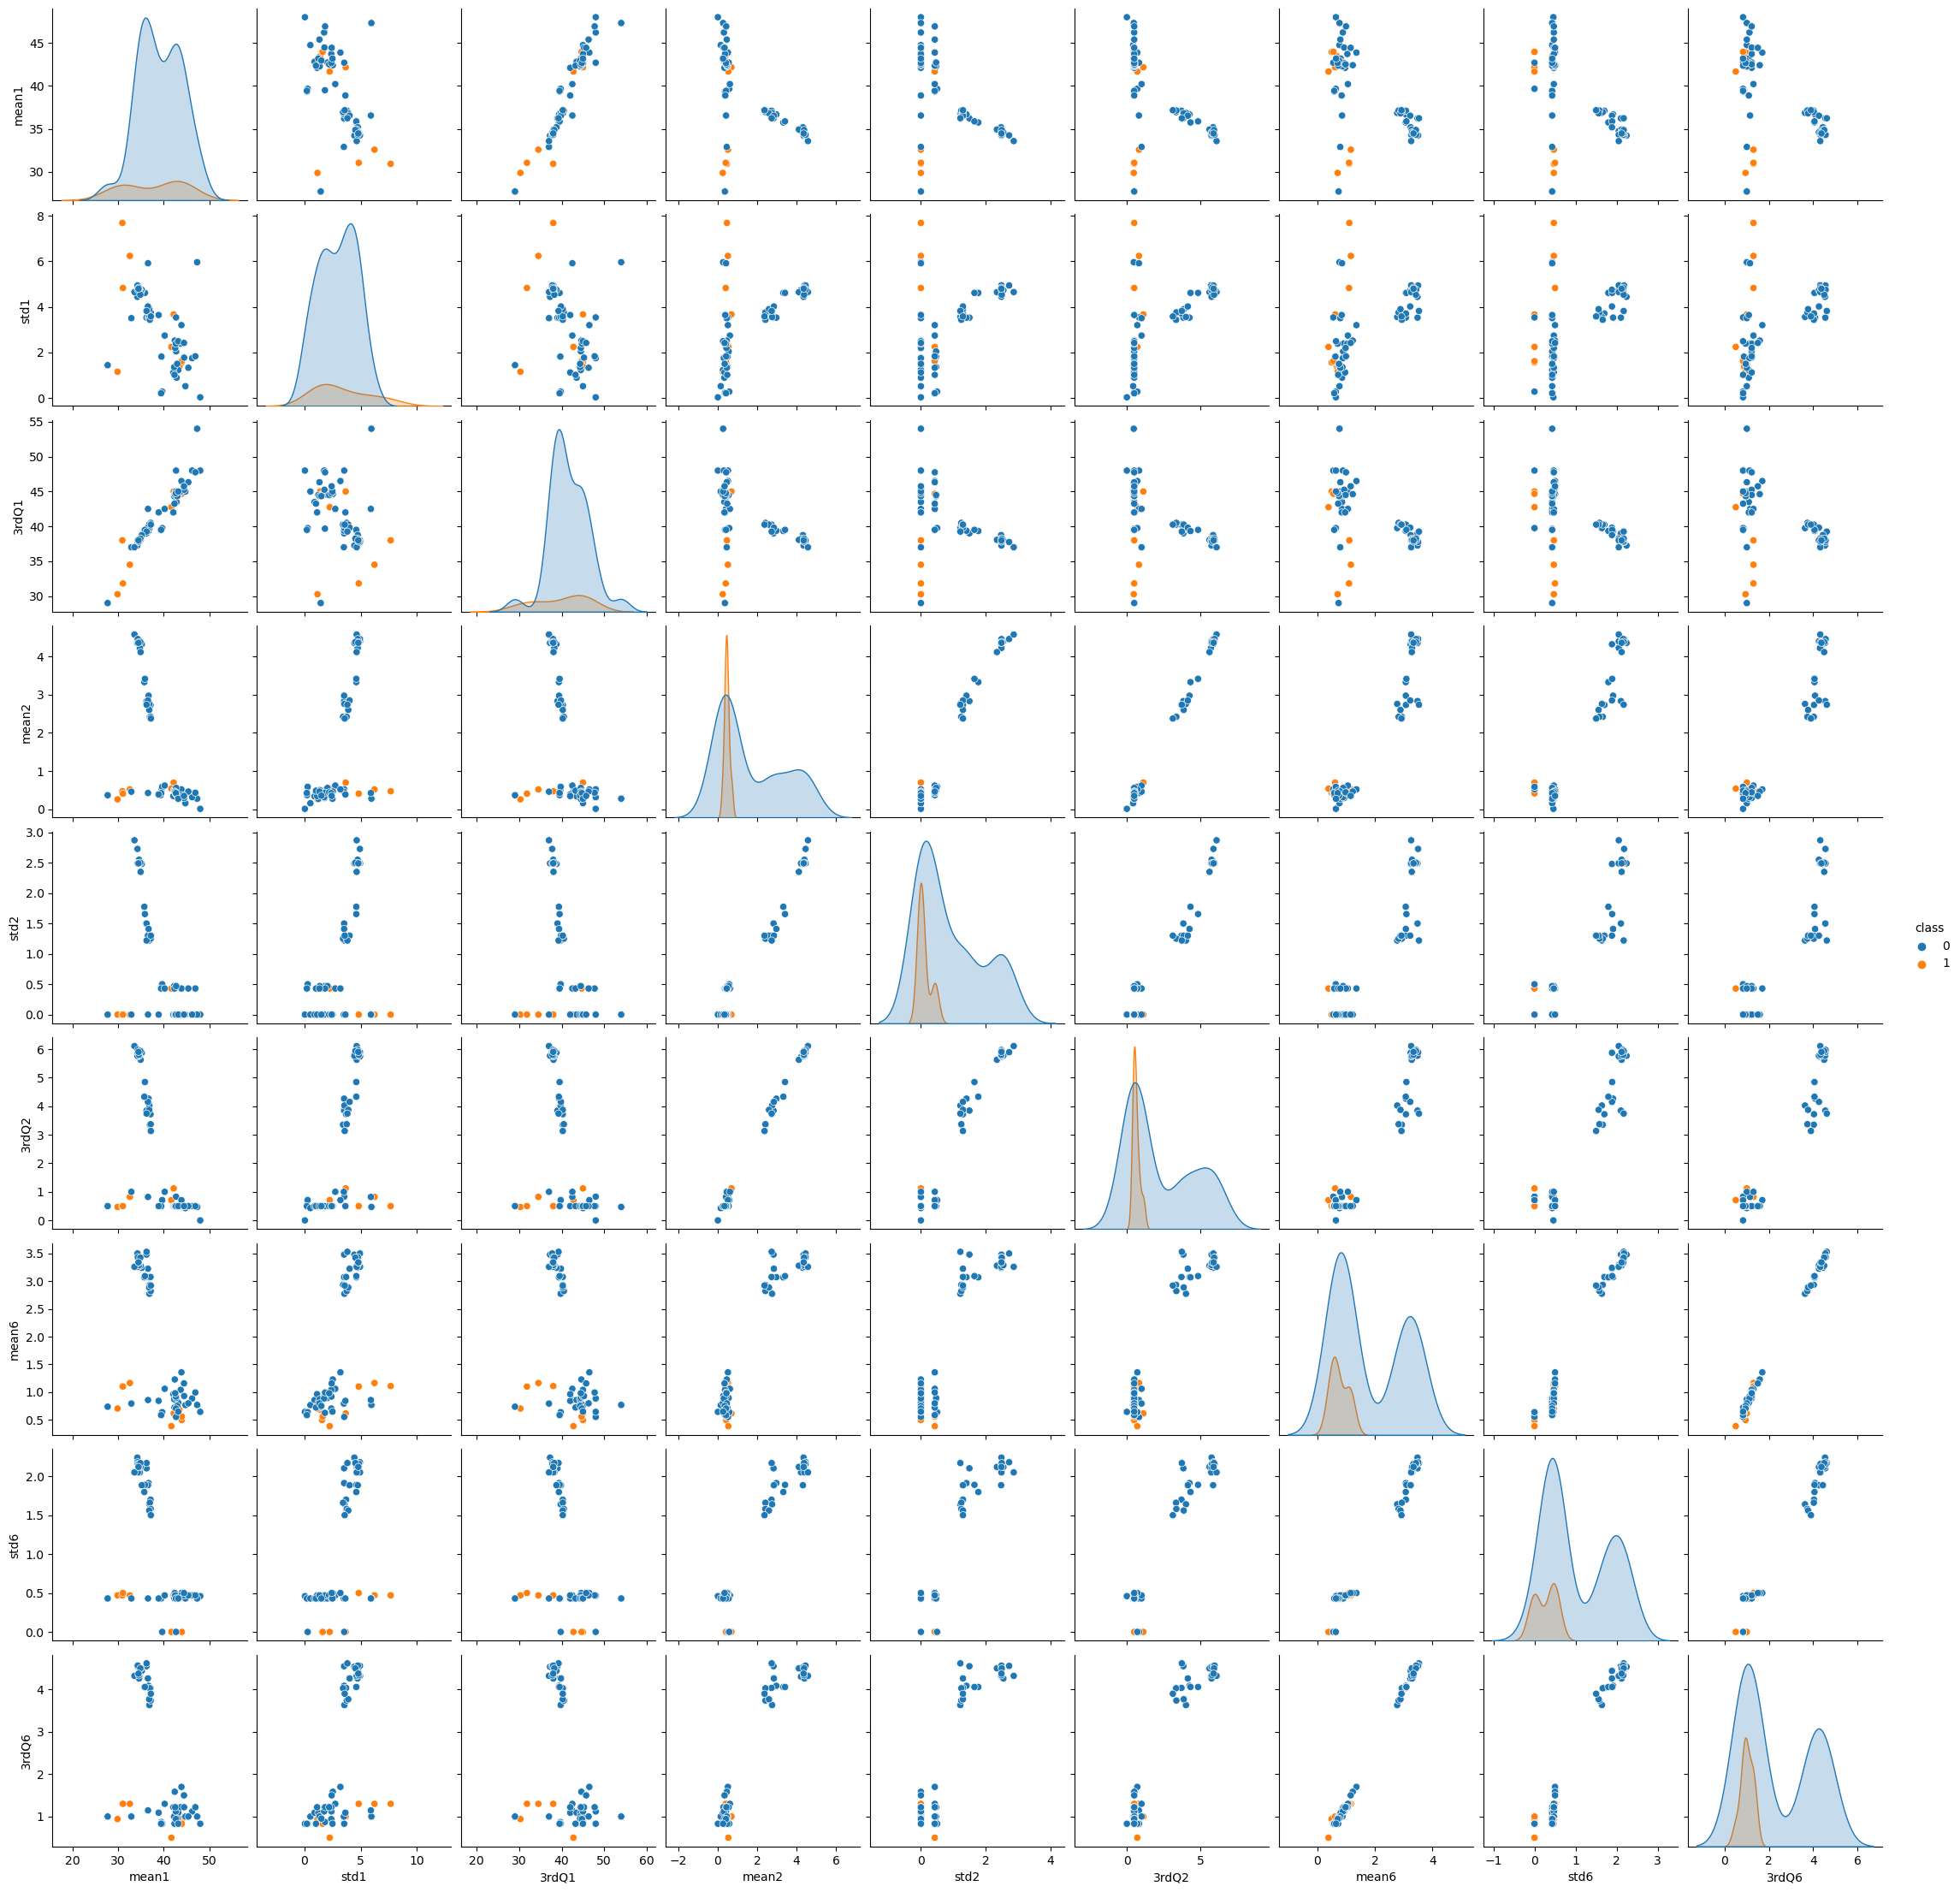

In [5]:
i = 1
columnsName = ['min1', 'max1', 'mean1', 'median1', 'std1','1stQ1', '3rdQ1', 'min2', 'max2', 'mean2', 'median2', 'std2', '1stQ2', '3rdQ2', 'min6', 'max6', 'mean6', 'median6', 'std6', '1stQ6', '3rdQ6']
Tabledata = []
bootstrapSample = []
for dat in trainData:
    if i < 9:
        bootstrapSample.append([dat[1].min(), dat[1].max(), dat[1].mean(), dat[1].median(), dat[1].std(), dat[1].describe()[4], dat[1].describe()[6], 
                     dat[2].min(), dat[2].max(), dat[2].mean(), dat[2].median(), dat[2].describe()[4], dat[2].std(), dat[2].describe()[6],
                     dat[6].min(), dat[6].max(), dat[6].mean(), dat[6].median(), dat[6].describe()[4], dat[6].std(), dat[6].describe()[6]])
    else:
        bootstrapSample.append([dat[1].min(), dat[1].max(), dat[1].mean(), dat[1].median(), dat[1].std(), dat[1].describe()[4], dat[1].describe()[6], 
                     dat[2].min(), dat[2].max(), dat[2].mean(), dat[2].median(), dat[2].describe()[4], dat[2].std(), dat[2].describe()[6],
                     dat[6].min(), dat[6].max(), dat[6].mean(), dat[6].median(), dat[6].describe()[4], dat[6].std(), dat[6].describe()[6]])
    i += 1

bootstrapdf = pd.DataFrame(bootstrapSample, columns=columnsName)
# First 9 instances are bending in trainData array
bootstrapdf['class'] = 1
bootstrapdf.loc[9:, 'class'] = 0
columnsName = ['mean1', 'std1', '3rdQ1','mean2', 'std2', '3rdQ2', 'mean6', 'std6', '3rdQ6']
seaborn.pairplot(bootstrapdf, hue ='class', vars=columnsName)

plt.show()


##### a) ii. Depict scatter plots of the features bisect each instance and increase the dimension with 12-time series features

          Amean1      Astd1     A3rdQ1     Amean2      Astd2     A3rdQ2  \
count  69.000000  69.000000  69.000000  69.000000  69.000000  69.000000   
mean   38.929513   2.714239  40.940181   1.511873   0.792826   2.044275   
std     4.919971   1.873917   4.209055   1.609944   0.961698   2.170602   
min    27.368417   0.016137  28.750000   0.001792   0.000000   0.000000   
25%    34.966250   1.279371  38.750000   0.371750   0.000000   0.500000   
50%    39.527250   2.673133  40.270000   0.498000   0.430000   0.500000   
75%    43.272134   4.272282  44.500000   2.792250   1.300000   4.067500   
max    48.001042   8.743464  48.000000   4.778292   2.867500   6.505000   

          Amean6      Astd6     A3rdQ6     Aclass     Bmean1      Bstd1  \
count  69.000000  69.000000  69.000000  69.000000  69.000000  69.000000   
mean    1.650040   0.942464   2.185507   0.130435  38.845837   2.544989   
std     1.167747   0.778966   1.544829   0.339248   4.975413   1.827043   
min     0.419083   0.000

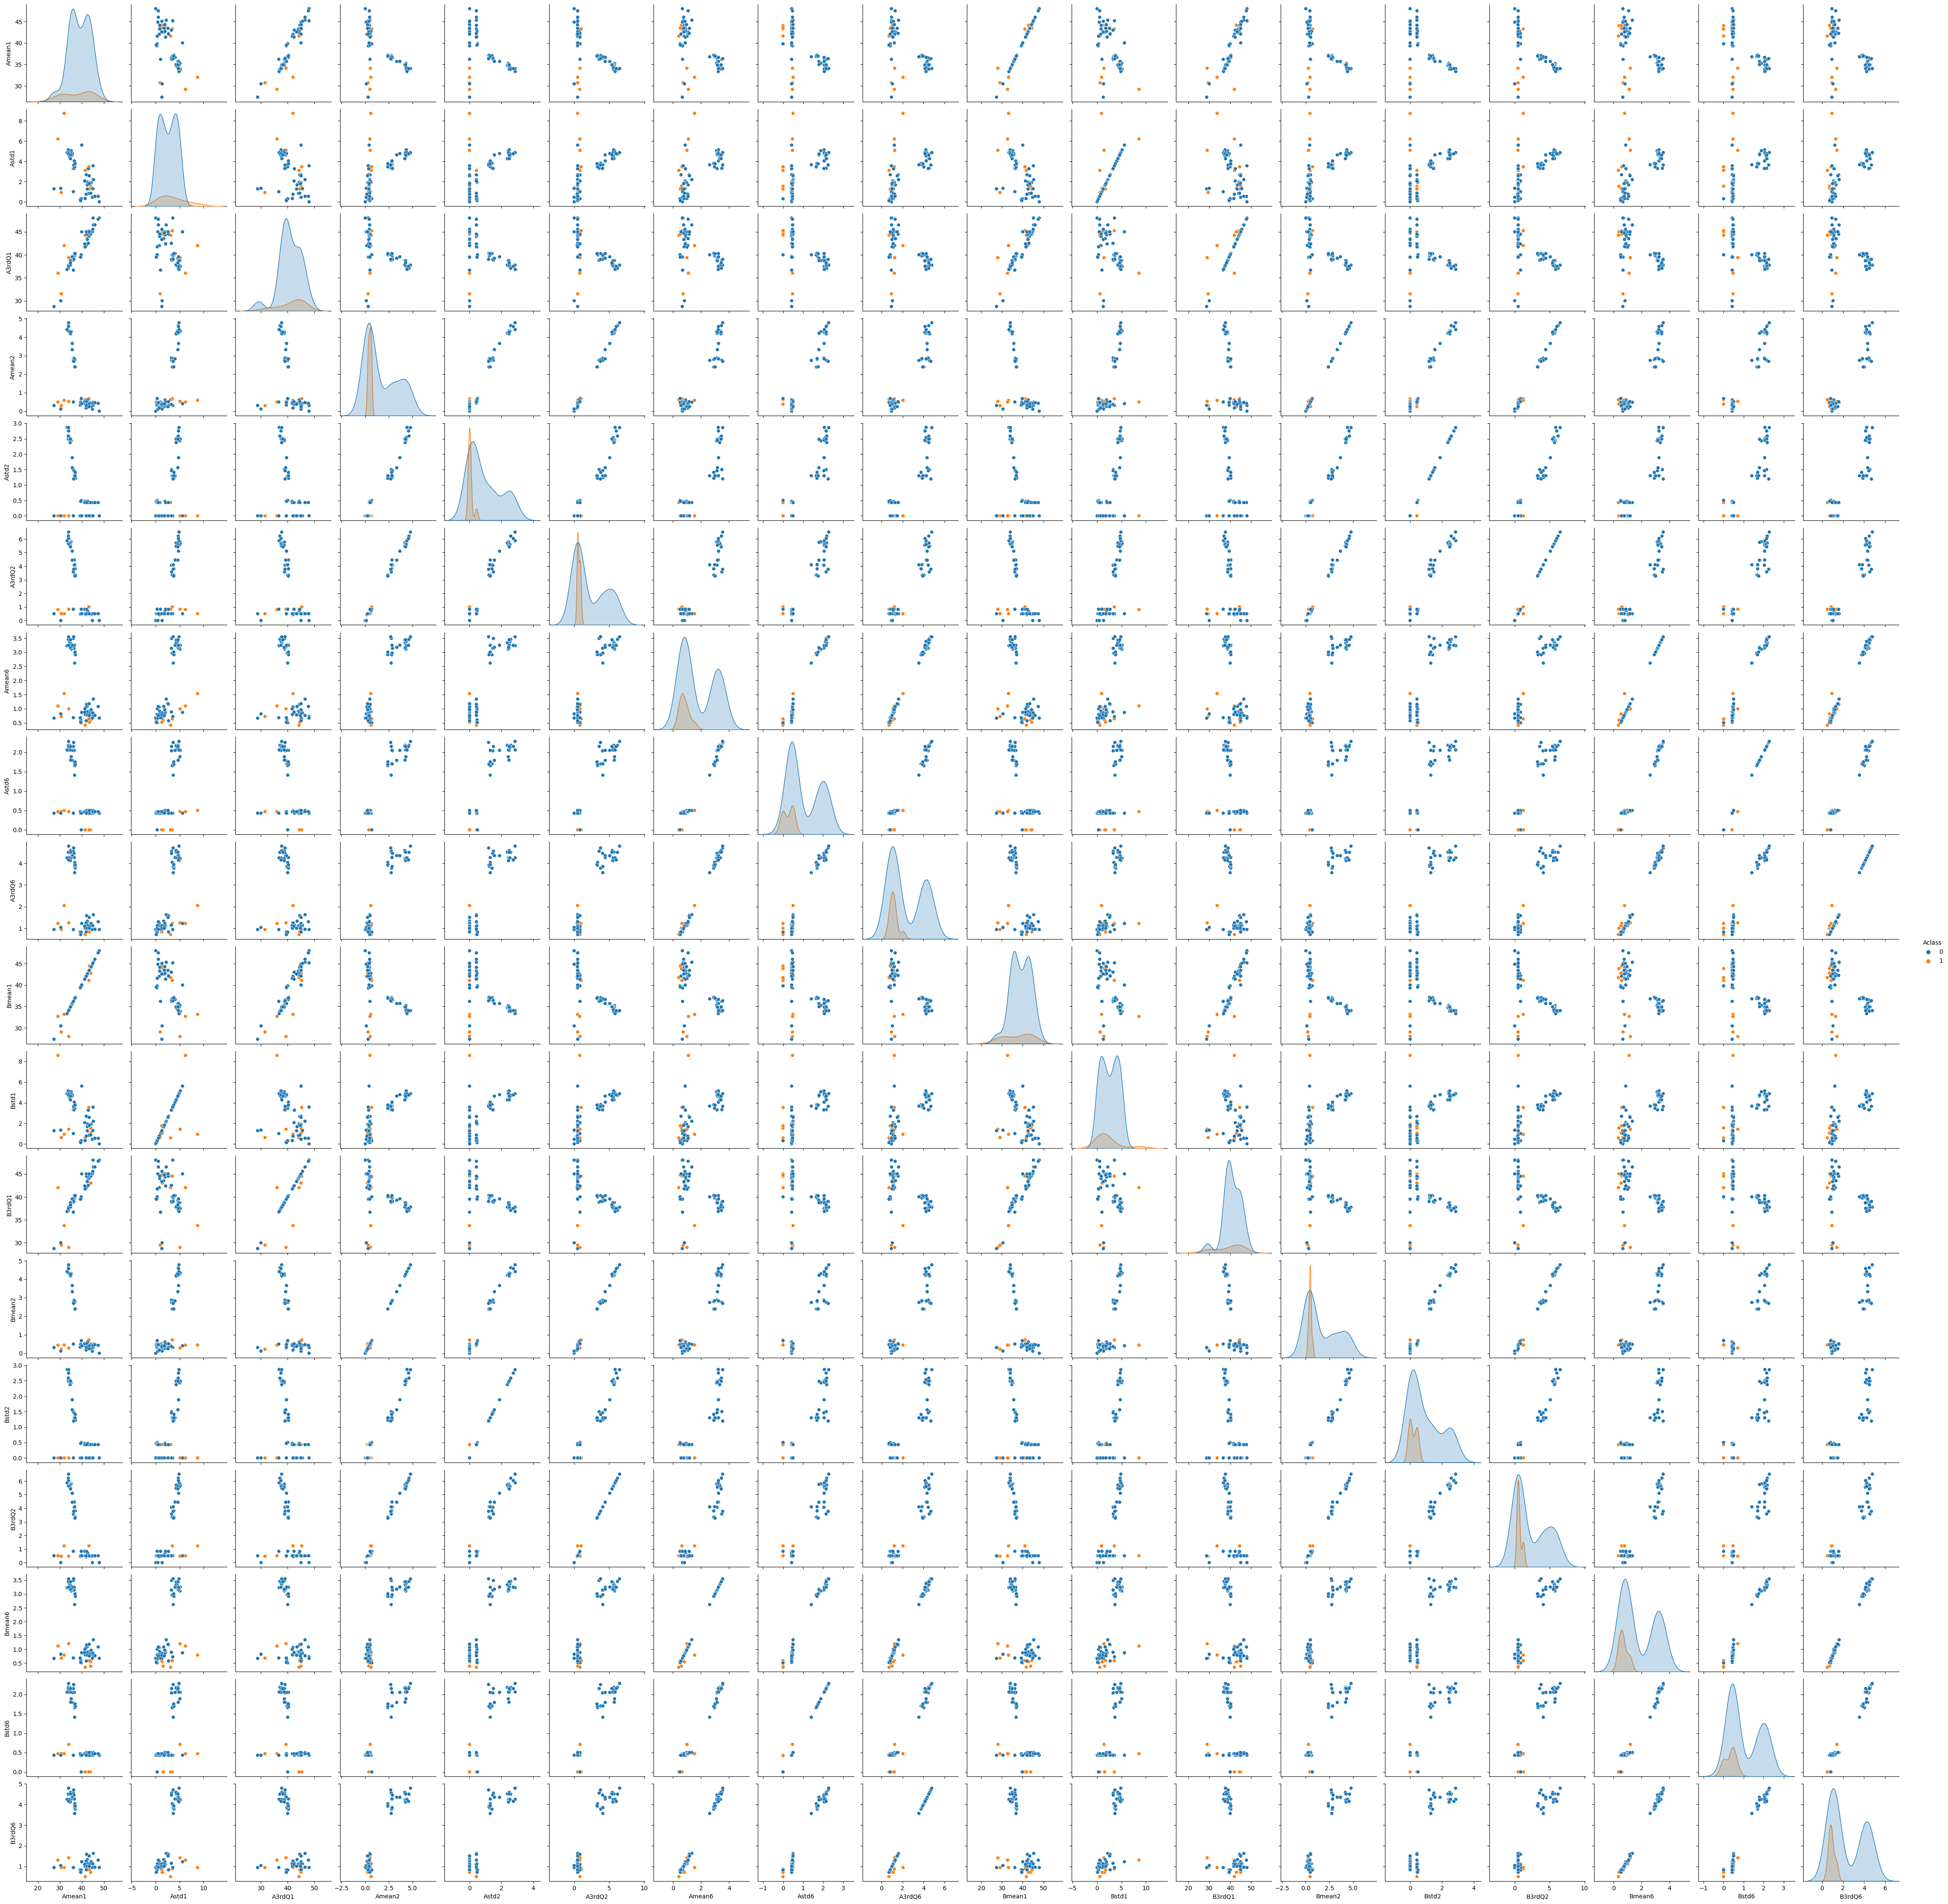

In [6]:
origcolumnsName = ['class', 'min1', 'max1', 'mean1', 'median1', 'std1','1stQ1', '3rdQ1', 'min2', 'max2', 'mean2', 'median2', 'std2', '1stQ2', '3rdQ2', 'min3', 'max3', 'mean3', 'median3', 'std3', '1stQ3', '3rdQ3', 'min4', 'max4', 'mean4', 'median4', 'std4', '1stQ4', '3rdQ4', 'min5', 'max5', 'mean5', 'median5', 'std5', '1stQ5', '3rdQ5', 'min6', 'max6', 'mean6', 'median6', 'std6', '1stQ6', '3rdQ6']
columnsName = ['mean1', 'std1', '3rdQ1', 'mean2', 'std2', '3rdQ2', 'mean6', 'std6', '3rdQ6', 'class']
newcolumnsName = ['Amean1', 'Astd1', 'A3rdQ1', 'Amean2', 'Astd2', 'A3rdQ2', 'Amean6', 'Astd6', 'A3rdQ6', 'Bmean1', 'Bstd1', 'B3rdQ1', 'Bmean2', 'Bstd2', 'B3rdQ2', 'Bmean6', 'Bstd6', 'B3rdQ6']
# First 9 instances are bending in analysisData array
bi1 = []
bi2 = []
i = 0
# I have all columns loaded - just in case needed for testing other features
for dat in trainData:
    if i < 9:
        bi1.append([1, dat[:int(len(dat)/2)][1].min(), dat[:int(len(dat)/2)][1].max(), dat[:int(len(dat)/2)][1].mean(), dat[:int(len(dat)/2)][1].median(), dat[:int(len(dat)/2)][1].std(), dat[:int(len(dat)/2)][1].describe()[4], dat[:int(len(dat)/2)][1].describe()[6], 
                         dat[:int(len(dat)/2)][2].min(), dat[:int(len(dat)/2)][2].max(), dat[:int(len(dat)/2)][2].mean(), dat[:int(len(dat)/2)][2].median(), dat[:int(len(dat)/2)][2].describe()[4], dat[:int(len(dat)/2)][2].std(), dat[:int(len(dat)/2)][2].describe()[6],
                         dat[:int(len(dat)/2)][3].min(), dat[:int(len(dat)/2)][3].max(), dat[:int(len(dat)/2)][3].mean(), dat[:int(len(dat)/2)][3].median(), dat[:int(len(dat)/2)][3].describe()[4], dat[:int(len(dat)/2)][3].std(), dat[:int(len(dat)/2)][3].describe()[6],
                         dat[:int(len(dat)/2)][4].min(), dat[:int(len(dat)/2)][4].max(), dat[:int(len(dat)/2)][4].mean(), dat[:int(len(dat)/2)][4].median(), dat[:int(len(dat)/2)][4].describe()[4], dat[:int(len(dat)/2)][4].std(), dat[:int(len(dat)/2)][4].describe()[6],
                         dat[:int(len(dat)/2)][5].min(), dat[:int(len(dat)/2)][5].max(), dat[:int(len(dat)/2)][5].mean(), dat[:int(len(dat)/2)][5].median(), dat[:int(len(dat)/2)][5].describe()[4], dat[:int(len(dat)/2)][5].std(), dat[:int(len(dat)/2)][5].describe()[6],
                         dat[:int(len(dat)/2)][6].min(), dat[:int(len(dat)/2)][6].max(), dat[:int(len(dat)/2)][6].mean(), dat[:int(len(dat)/2)][6].median(), dat[:int(len(dat)/2)][6].describe()[4], dat[:int(len(dat)/2)][6].std(), dat[:int(len(dat)/2)][6].describe()[6]])
        bi2.append([1, dat[int(len(dat)/2):][1].min(), dat[int(len(dat)/2):][1].max(), dat[int(len(dat)/2):][1].mean(), dat[int(len(dat)/2):][1].median(), dat[int(len(dat)/2):][1].std(), dat[int(len(dat)/2):][1].describe()[4], dat[int(len(dat)/2):][1].describe()[6], 
                         dat[int(len(dat)/2):][2].min(), dat[int(len(dat)/2):][2].max(), dat[int(len(dat)/2):][2].mean(), dat[int(len(dat)/2):][2].median(), dat[int(len(dat)/2):][2].describe()[4], dat[int(len(dat)/2):][2].std(), dat[int(len(dat)/2):][2].describe()[6],
                         dat[int(len(dat)/2):][3].min(), dat[int(len(dat)/2):][3].max(), dat[int(len(dat)/2):][3].mean(), dat[int(len(dat)/2):][3].median(), dat[int(len(dat)/2):][3].describe()[4], dat[int(len(dat)/2):][3].std(), dat[int(len(dat)/2):][3].describe()[6],
                         dat[int(len(dat)/2):][4].min(), dat[int(len(dat)/2):][4].max(), dat[int(len(dat)/2):][4].mean(), dat[int(len(dat)/2):][4].median(), dat[int(len(dat)/2):][4].describe()[4], dat[int(len(dat)/2):][4].std(), dat[int(len(dat)/2):][4].describe()[6],
                         dat[int(len(dat)/2):][5].min(), dat[int(len(dat)/2):][5].max(), dat[int(len(dat)/2):][5].mean(), dat[int(len(dat)/2):][5].median(), dat[int(len(dat)/2):][5].describe()[4], dat[int(len(dat)/2):][5].std(), dat[int(len(dat)/2):][5].describe()[6],
                         dat[int(len(dat)/2):][6].min(), dat[int(len(dat)/2):][6].max(), dat[int(len(dat)/2):][6].mean(), dat[int(len(dat)/2):][6].median(), dat[int(len(dat)/2):][6].describe()[4], dat[int(len(dat)/2):][6].std(), dat[int(len(dat)/2):][6].describe()[6]])
    if i >=9:
        bi1.append([0, dat[:int(len(dat)/2)][1].min(), dat[:int(len(dat)/2)][1].max(), dat[:int(len(dat)/2)][1].mean(), dat[:int(len(dat)/2)][1].median(), dat[:int(len(dat)/2)][1].std(), dat[:int(len(dat)/2)][1].describe()[4], dat[:int(len(dat)/2)][1].describe()[6], 
                         dat[:int(len(dat)/2)][2].min(), dat[:int(len(dat)/2)][2].max(), dat[:int(len(dat)/2)][2].mean(), dat[:int(len(dat)/2)][2].median(), dat[:int(len(dat)/2)][2].describe()[4], dat[:int(len(dat)/2)][2].std(), dat[:int(len(dat)/2)][2].describe()[6],
                         dat[:int(len(dat)/2)][3].min(), dat[:int(len(dat)/2)][3].max(), dat[:int(len(dat)/2)][3].mean(), dat[:int(len(dat)/2)][3].median(), dat[:int(len(dat)/2)][3].describe()[4], dat[:int(len(dat)/2)][3].std(), dat[:int(len(dat)/2)][3].describe()[6],
                         dat[:int(len(dat)/2)][4].min(), dat[:int(len(dat)/2)][4].max(), dat[:int(len(dat)/2)][4].mean(), dat[:int(len(dat)/2)][4].median(), dat[:int(len(dat)/2)][4].describe()[4], dat[:int(len(dat)/2)][4].std(), dat[:int(len(dat)/2)][4].describe()[6],
                         dat[:int(len(dat)/2)][5].min(), dat[:int(len(dat)/2)][5].max(), dat[:int(len(dat)/2)][5].mean(), dat[:int(len(dat)/2)][5].median(), dat[:int(len(dat)/2)][5].describe()[4], dat[:int(len(dat)/2)][5].std(), dat[:int(len(dat)/2)][5].describe()[6],
                         dat[:int(len(dat)/2)][6].min(), dat[:int(len(dat)/2)][6].max(), dat[:int(len(dat)/2)][6].mean(), dat[:int(len(dat)/2)][6].median(), dat[:int(len(dat)/2)][6].describe()[4], dat[:int(len(dat)/2)][6].std(), dat[:int(len(dat)/2)][6].describe()[6]])
        bi2.append([0, dat[:int(len(dat)/2)][1].min(), dat[:int(len(dat)/2)][1].max(), dat[:int(len(dat)/2)][1].mean(), dat[:int(len(dat)/2)][1].median(), dat[:int(len(dat)/2)][1].std(), dat[:int(len(dat)/2)][1].describe()[4], dat[:int(len(dat)/2)][1].describe()[6], 
                         dat[:int(len(dat)/2)][2].min(), dat[:int(len(dat)/2)][2].max(), dat[:int(len(dat)/2)][2].mean(), dat[:int(len(dat)/2)][2].median(), dat[:int(len(dat)/2)][2].describe()[4], dat[:int(len(dat)/2)][2].std(), dat[:int(len(dat)/2)][2].describe()[6],
                         dat[:int(len(dat)/2)][3].min(), dat[:int(len(dat)/2)][3].max(), dat[:int(len(dat)/2)][3].mean(), dat[:int(len(dat)/2)][3].median(), dat[:int(len(dat)/2)][3].describe()[4], dat[:int(len(dat)/2)][3].std(), dat[:int(len(dat)/2)][3].describe()[6],
                         dat[:int(len(dat)/2)][4].min(), dat[:int(len(dat)/2)][4].max(), dat[:int(len(dat)/2)][4].mean(), dat[:int(len(dat)/2)][4].median(), dat[:int(len(dat)/2)][4].describe()[4], dat[:int(len(dat)/2)][4].std(), dat[:int(len(dat)/2)][4].describe()[6],
                         dat[:int(len(dat)/2)][5].min(), dat[:int(len(dat)/2)][5].max(), dat[:int(len(dat)/2)][5].mean(), dat[:int(len(dat)/2)][5].median(), dat[:int(len(dat)/2)][5].describe()[4], dat[:int(len(dat)/2)][5].std(), dat[:int(len(dat)/2)][5].describe()[6],
                         dat[:int(len(dat)/2)][6].min(), dat[:int(len(dat)/2)][6].max(), dat[:int(len(dat)/2)][6].mean(), dat[:int(len(dat)/2)][6].median(), dat[:int(len(dat)/2)][6].describe()[4], dat[:int(len(dat)/2)][6].std(), dat[:int(len(dat)/2)][6].describe()[6]])
    i += 1

bi1 = pd.DataFrame(bi1, columns=origcolumnsName)
bi2 = pd.DataFrame(bi2, columns=origcolumnsName)
    
    

    
data1 = bi1[columnsName]
data1.rename(columns={'mean1': 'Amean1', 'std1': 'Astd1', '3rdQ1': 'A3rdQ1', 'mean2': 'Amean2', 'std2': 'Astd2', '3rdQ2': 'A3rdQ2', 'mean6': 'Amean6', 'std6': 'Astd6', '3rdQ6': 'A3rdQ6', 'class': 'Aclass'}, inplace=True)

data2 = bi2[columnsName]
data2.rename(columns={'mean1': 'Bmean1', 'std1': 'Bstd1', '3rdQ1': 'B3rdQ1', 'mean2': 'Bmean2', 'std2': 'Bstd2', '3rdQ2': 'B3rdQ2', 'mean6': 'Bmean6', 'std6': 'Bstd6', '3rdQ6': 'B3rdQ6', 'class': 'Bclass'}, inplace=True)

newData = pd.concat([data1, data2], axis=1)
print(newData.describe())

seaborn.pairplot(newData, hue ='Aclass', vars=newcolumnsName)
print("PairPlot for bisected Data")
plt.show()

#### Result: Very similar to previous pairplot. 

##### a) iii). Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression

In [7]:
l = 1

# prepare the cross-validation procedure
cv = StratifiedKFold(5)


# create model
model = LogisticRegression(max_iter=50, penalty='none')
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=1,
    n_jobs=1,
)

bestScore = 0
bestl = 0
bestp = 0
bestFeatures = []
while l < 21:
    print("Processing l = " + str(l))
    ldata = []
    i = 1
    for dat in trainData:
        tempL = l
        tempdat = np.array_split(dat, l)
        tempDat = []
        for da in tempdat:
            tempDat = tempDat + [da[1].mean(), da[1].std(), da[1].describe()[6], da[2].mean(), da[2].std(), da[2].describe()[6], da[6].mean(), da[6].std(), da[6].describe()[6]]
#         First 9 instances bending
        if i <= 9:
            ldata.append([1] + tempDat)
        else:
            ldata.append([0] + tempDat)
        i += 1
    columns = [str(x) for x in range(0, l*9 + 1)]
    trainingColumns = [str(x) for x in range(1, l*9 + 1)]
    trainDF = pd.DataFrame(ldata, columns=columns)
    rfecv.fit(trainDF[trainingColumns], trainDF['0'])
#     Excluding target feature 
    print('l: ' + str(l) + '  p: ' + str(l*9))
    print("Best for l,p: " + str(l) +',' + str(rfecv.n_features_))
    currentScore = rfecv.score(trainDF[trainingColumns], trainDF['0'])
    print ("Classifier score is: %s " % currentScore)
    if bestScore < currentScore:
        bestScore = currentScore
        bestl = l
        bestp = rfecv.n_features_
        mask = rfecv.get_support() 
        bestFeatures = trainDF[trainingColumns].columns[mask]
    l+=1

Processing l = 1
l: 1  p: 9
Best for l,p: 1,7
Classifier score is: 0.9130434782608695 
Processing l = 2
l: 2  p: 18
Best for l,p: 2,1
Classifier score is: 0.8695652173913043 
Processing l = 3
l: 3  p: 27
Best for l,p: 3,4
Classifier score is: 0.9420289855072463 
Processing l = 4
l: 4  p: 36
Best for l,p: 4,1
Classifier score is: 0.8840579710144928 
Processing l = 5
l: 5  p: 45
Best for l,p: 5,9
Classifier score is: 0.927536231884058 
Processing l = 6
l: 6  p: 54
Best for l,p: 6,1
Classifier score is: 0.8695652173913043 
Processing l = 7
l: 7  p: 63
Best for l,p: 7,14
Classifier score is: 0.9130434782608695 
Processing l = 8
l: 8  p: 72
Best for l,p: 8,24
Classifier score is: 1.0 
Processing l = 9
l: 9  p: 81
Best for l,p: 9,2
Classifier score is: 0.8695652173913043 
Processing l = 10
l: 10  p: 90
Best for l,p: 10,45
Classifier score is: 0.9855072463768116 
Processing l = 11
l: 11  p: 99
Best for l,p: 11,26
Classifier score is: 1.0 
Processing l = 12
l: 12  p: 108
Best for l,p: 12,52
Cl

##### a) iv). Report the confusion matrix and show the ROC and AUC for your classifier on train data

Best features from rfe: Index(['2', '9', '12', '22', '24', '29', '30', '31', '33', '37', '40', '42',
       '49', '51', '52', '53', '54', '56', '58', '60', '61', '63', '70', '72'],
      dtype='object')
Best L,P: 824
Coefficients: [[ 102.18828438 -126.87667088   97.62864337 -117.04880558 -148.61418307
   158.91291188  134.0097775  -118.97194671 -131.60864604 -214.31544741
  -122.45129874 -138.2478012  -116.60674272 -127.43585713 -174.638771
  -108.48332403 -232.94065255  226.30953798 -126.10748657 -118.95466501
  -113.32626171 -151.4913753  -137.80879707 -155.13236182]]
P-Values: [0.10337344 0.0124823  0.51642297 0.00586307 0.00124551 0.75803694
 0.5064132  0.00718192 0.00224285 0.24462643 0.00510701 0.00163427
 0.0041856  0.0016331  0.01472814 0.11561409 0.00538628 0.86267311
 0.00436843 0.00236293 0.0186935  0.00773227 0.00931939 0.00337481]
Confusion Matrix
[[60  0]
 [ 0  9]]
Accuracy Score:1.0
auc =  1.0


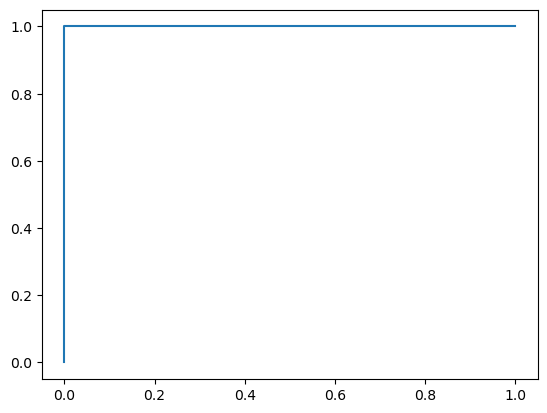

In [8]:
print("Best features from rfe: "+ str(bestFeatures))
print("Best L,P: "+ str(bestl)+ str(bestp))
ldata = []
i = 1
for dat in trainData:
    tempL = l
    tempdat = np.array_split(dat, bestl)
    tempDat = []
    for da in tempdat:
        tempDat = tempDat + [da[1].mean(), da[1].std(), da[1].describe()[6], da[2].mean(), da[2].std(), da[2].describe()[6], da[6].mean(), da[6].std(), da[6].describe()[6]]
#         First 9 instances bending
    if i <= 9:
         ldata.append([1] + tempDat)  
    else:
        ldata.append([0] + tempDat)
    i += 1
columns = [str(x) for x in range(0, bestl*9 + 1)]
trainingColumns = [str(x) for x in range(1, bestl*9 + 1)]
trainDF = pd.DataFrame(ldata, columns=columns)
    
    
# building the model and fitting the data
model = LogisticRegression(max_iter=2000, penalty='none')
model.fit(trainDF[bestFeatures], trainDF['0'])
predictions = model.predict(trainDF[bestFeatures])
print("Coefficients: "+ str(model.coef_))
print("P-Values: " + str(chi2(trainDF[bestFeatures], trainDF['0'])[1]))
print("Confusion Matrix")
print(confusion_matrix(trainDF['0'], predictions))
print("Accuracy Score:" + str(accuracy_score(trainDF['0'], predictions)))
fpr, tpr, thresholds_keras = roc_curve(predictions, trainDF['0'])
plt.plot(fpr,tpr)
aucm = auc(fpr, tpr)
print('auc = ' , aucm)

##### a) v). Test the classifier on the test set

In [9]:

print("Processing l = " + str(bestl))
ldata = []
i = 1
for dat in testData:
    tempdat = np.array_split(dat, bestl)
    tempDat = []
    for da in tempdat:
        tempDat = tempDat + [da[1].mean(), da[1].std(), da[1].describe()[6], da[2].mean(), da[2].std(), da[2].describe()[6], da[6].mean(), da[6].std(), da[6].describe()[6]]
#         First 4 instances bending
    if i <= 4:
        ldata.append([1] + tempDat)
    else:
        ldata.append([0] + tempDat)
    i += 1
columns = [str(x) for x in range(0, bestl*9 + 1)]
trainingColumns = [str(x) for x in range(1, bestl*9 + 1)]
testDF = pd.DataFrame(ldata, columns=columns)
predictions = model.predict(testDF[bestFeatures])
print("Confusion Matrix")
print(confusion_matrix(testDF['0'], predictions))
print("Accuracy Score:" + str(accuracy_score(testDF['0'], predictions)))

Processing l = 8
Confusion Matrix
[[14  1]
 [ 1  3]]
Accuracy Score:0.8947368421052632


##### Accuracy scores are very close for both Training and Testing Data set: 1.0

##### a) vi). Yes, I faced the issue. -> max_iter was set to stop the instability to wreak chaos :)

##### a) vii. build a logistic regression model based on case-control sampling and adjust its parameters

In [10]:
l = 1

# prepare the cross-validation procedure
cv = StratifiedKFold(5)
oversample = SMOTE(k_neighbors=3)

# create model
model = LogisticRegression(max_iter=50, penalty='none')
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=1,
    n_jobs=1,
)

bestScore = 0
bestl = 0
bestp = 0
bestFeatures = []
while l < 21:
    print("Processing l = " + str(l))
    ldata = []
    tdata = []
    target = []
    i = 1
    for dat in trainData:
        tempL = l
        tempdat = np.array_split(dat, l)
        tempDat = []
        for da in tempdat:
            tempDat = tempDat + [da[1].mean(), da[1].std(), da[1].describe()[6], da[2].mean(), da[2].std(), da[2].describe()[6], da[6].mean(), da[6].std(), da[6].describe()[6]]
#         First 9 instances bending
        if i <= 9:
            ldata.append([1] + tempDat)
        else:
            ldata.append([0] + tempDat)
        tdata.append(tempDat)
        i += 1
    columns = [str(x) for x in range(0, l*9 + 1)]
    trainingColumns = [str(x) for x in range(1, l*9 + 1)]
#     trainDF = pd.DataFrame(ldata, columns=columns)
    X, y = oversample.fit_resample(tdata, [1 for x in range(0, 9)] + [0 for x in range(0, 60)])
    trainDF = pd.DataFrame(X, columns=trainingColumns)
    target = pd.DataFrame(y, columns=['0'])
    rfecv.fit(trainDF[trainingColumns], target['0'])
#     Excluding target feature 
    print('l: ' + str(l) + '  p: ' + str(l*9))
    print("Best for l,p: " + str(l) +',' + str(rfecv.n_features_))
    currentScore = rfecv.score(trainDF[trainingColumns], target['0'])
    print ("Classifier score is: %s " % currentScore)
    if bestScore < currentScore:
        bestScore = currentScore
        bestl = l
        bestp = rfecv.n_features_
        mask = rfecv.get_support() 
        bestFeatures = trainDF[trainingColumns].columns[mask]
    l+=1
    


Processing l = 1
l: 1  p: 9
Best for l,p: 1,8
Classifier score is: 0.8833333333333333 
Processing l = 2
l: 2  p: 18
Best for l,p: 2,15
Classifier score is: 0.95 
Processing l = 3
l: 3  p: 27
Best for l,p: 3,21
Classifier score is: 0.9583333333333334 
Processing l = 4
l: 4  p: 36
Best for l,p: 4,13
Classifier score is: 1.0 
Processing l = 5
l: 5  p: 45
Best for l,p: 5,44
Classifier score is: 0.9416666666666667 
Processing l = 6
l: 6  p: 54
Best for l,p: 6,10
Classifier score is: 0.925 
Processing l = 7
l: 7  p: 63
Best for l,p: 7,7
Classifier score is: 1.0 
Processing l = 8
l: 8  p: 72
Best for l,p: 8,7
Classifier score is: 0.9416666666666667 
Processing l = 9
l: 9  p: 81
Best for l,p: 9,81
Classifier score is: 0.9666666666666667 
Processing l = 10
l: 10  p: 90
Best for l,p: 10,32
Classifier score is: 1.0 
Processing l = 11
l: 11  p: 99
Best for l,p: 11,12
Classifier score is: 0.975 
Processing l = 12
l: 12  p: 108
Best for l,p: 12,39
Classifier score is: 1.0 
Processing l = 13
l: 13  p

Best features from rfe: Index(['2', '8', '9', '12', '13', '15', '17', '21', '22', '25', '26', '34',
       '36'],
      dtype='object')
Best L,P: 4,13
Coefficients: [[  8.76203619  13.46819063  -6.91095209   2.90671037  -6.70714982
  -13.25628834  -4.64937869  -2.68461554   3.99136077  -9.3083978
  -14.57707651  -9.03715676  -8.05928728]]
P-Values: [1.95407495e-01 1.20089316e-01 4.19968106e-08 1.88754204e-01
 4.18673489e-11 8.53345349e-15 4.40399671e-02 1.67016945e-05
 7.91869363e-12 2.67202773e-06 9.03922399e-03 9.72526838e-08
 1.98335882e-09]
Confusion Matrix
[[57  3]
 [ 0 60]]
Accuracy Score:0.975
auc = 0.9761904761904762


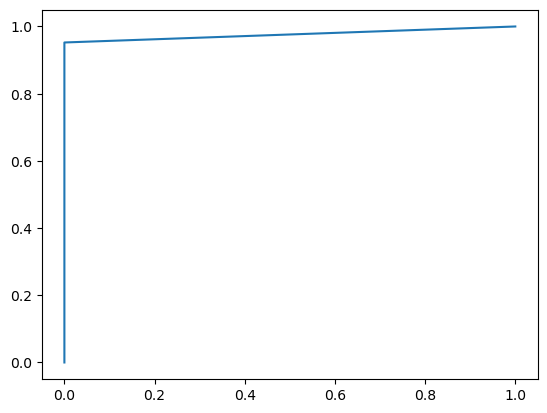

In [11]:
print("Best features from rfe: "+ str(bestFeatures))
print("Best L,P: "+ str(bestl)+ ','+str(bestp))
ldata = []
tdata = []
target = []
i = 1
for dat in trainData:
    tempL = l
    tempdat = np.array_split(dat, bestl)
    tempDat = []
    for da in tempdat:
        tempDat = tempDat + [da[1].mean(), da[1].std(), da[1].describe()[6], da[2].mean(), da[2].std(), da[2].describe()[6], da[6].mean(), da[6].std(), da[6].describe()[6]]
#         First 9 instances bending
    if i <= 9:
         ldata.append([1] + tempDat)  
    else:
        ldata.append([0] + tempDat)
    tdata.append(tempDat)
    i += 1
columns = [str(x) for x in range(0, bestl*9 + 1)]
trainingColumns = [str(x) for x in range(1, bestl*9 + 1)]
# trainDF = pd.DataFrame(ldata, columns=columns)
X, y = oversample.fit_resample(tdata, [1 for x in range(0, 9)] + [0 for x in range(0, 60)])
trainDF = pd.DataFrame(X, columns=trainingColumns)
target = pd.DataFrame(y, columns=['0'])
# rfecv.fit(trainDF[trainingColumns], target['0'])
    
# building the model and fitting the data
model = LogisticRegression(max_iter=50, penalty='none')
model.fit(trainDF[bestFeatures], target['0'])
predictions = model.predict(trainDF[bestFeatures])
print("Coefficients: "+ str(model.coef_))
print("P-Values: " + str(chi2(trainDF[bestFeatures], target['0'])[1]))
print("Confusion Matrix")
print(confusion_matrix(target['0'], predictions))
fpr, tpr, thresholds_keras = roc_curve(predictions, target['0'])
plt.plot(fpr,tpr)
print("Accuracy Score:" + str(accuracy_score(target['0'], predictions)))

aucm = auc(fpr, tpr)
print("auc = " + str(aucm))

Best features from rfe: Index(['2', '8', '9', '12', '13', '15', '17', '21', '22', '25', '26', '34',
       '36'],
      dtype='object')
Best L,P: 4,13
Coefficients: [[  8.76203619  13.46819063  -6.91095209   2.90671037  -6.70714982
  -13.25628834  -4.64937869  -2.68461554   3.99136077  -9.3083978
  -14.57707651  -9.03715676  -8.05928728]]
P-Values: [3.43217836e-02 7.48420422e-02 4.37713965e-03 1.04815201e-02
 1.71267029e-03 8.40786446e-04 1.13098305e-01 2.50429764e-04
 3.20160165e-03 5.25794395e-02 3.05583157e-01 2.45099546e-02
 1.93325572e-02]
Confusion Matrix
[[13  2]
 [ 7  8]]
auc= 0.7250000000000001
Accuracy Score:0.7


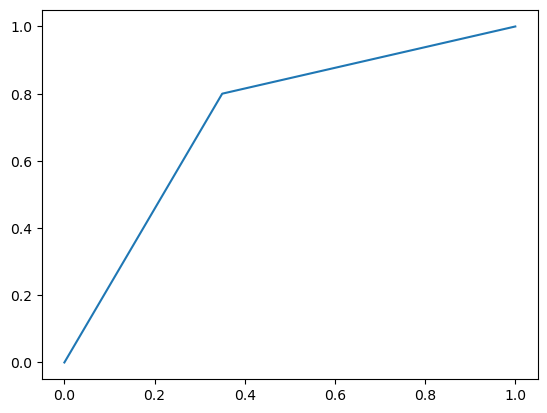

In [12]:
print("Best features from rfe: "+ str(bestFeatures))
print("Best L,P: "+ str(bestl)+ ','+str(bestp))
ldata = []
tdata = []
target = []
oversample = SMOTE(k_neighbors=3)
i = 1
for dat in testData:
    tempL = l
    tempdat = np.array_split(dat, bestl)
    tempDat = []
    for da in tempdat:
        tempDat = tempDat + [da[1].mean(), da[1].std(), da[1].describe()[6], da[2].mean(), da[2].std(), da[2].describe()[6], da[6].mean(), da[6].std(), da[6].describe()[6]]
#         First 4 instances bending
    if i <= 4:
         ldata.append([1] + tempDat)  
    else:
        ldata.append([0] + tempDat)
    tdata.append(tempDat)
    i += 1
columns = [str(x) for x in range(0, bestl*9 + 1)]
trainingColumns = [str(x) for x in range(1, bestl*9 + 1)]
# trainDF = pd.DataFrame(ldata, columns=columns)
X, y = oversample.fit_resample(tdata, [1 for x in range(0, 4)] + [0 for x in range(0, 15)])
trainDF = pd.DataFrame(X, columns=trainingColumns)
target = pd.DataFrame(y, columns=['0'])

predictions = model.predict(trainDF[bestFeatures])
print("Coefficients: "+ str(model.coef_))
print("P-Values: " + str(chi2(trainDF[bestFeatures], target['0'])[1]))
print("Confusion Matrix")
print(confusion_matrix(target['0'], predictions))
fpr, tpr, thresholds_keras = roc_curve(predictions, target['0'])
plt.plot(fpr,tpr)
aucm = auc(fpr, tpr)
print("auc=", aucm)
print("Accuracy Score:" + str(accuracy_score(target['0'], predictions)))

##### b. i). . Repeat 2(a)iii using L1-penalized logistic regression

In [13]:
l = 1

# prepare the cross-validation procedure
model = LogisticRegressionCV(max_iter=50, solver='liblinear', penalty='l1', cv=5)

bestScore = 0
bestl = 0
bestc = 0
bestFeatures = []
while l < 21:
    print("Processing l = " + str(l))
    ldata = []
    i = 1
    for dat in trainData:
        tempL = l
        tempdat = np.array_split(dat, l)
        tempDat = []
        for da in tempdat:
            tempDat = tempDat + [da[1].mean(), da[1].std(), da[1].describe()[6], da[2].mean(), da[2].std(), da[2].describe()[6], da[6].mean(), da[6].std(), da[6].describe()[6]]
#         First 9 instances bending
        if i <= 9:
            ldata.append([1] + tempDat)
        else:
            ldata.append([0] + tempDat)
        i += 1
    columns = [str(x) for x in range(0, l*9 + 1)]
    trainingColumns = [str(x) for x in range(1, l*9 + 1)]
    trainDF = pd.DataFrame(ldata, columns=columns)
    model.fit(trainDF[trainingColumns], trainDF['0'])
#     Excluding target feature 
    currentScore = model.score(trainDF[trainingColumns], trainDF['0'])
    print ("Classifier score is: %s " % currentScore)
    if bestScore < currentScore:
        bestScore = currentScore
        bestl = l
        bestc = model.Cs_
    l+=1

Processing l = 1
Classifier score is: 0.9130434782608695 
Processing l = 2
Classifier score is: 0.8695652173913043 
Processing l = 3
Classifier score is: 0.8695652173913043 
Processing l = 4
Classifier score is: 0.8695652173913043 
Processing l = 5
Classifier score is: 1.0 
Processing l = 6
Classifier score is: 0.9565217391304348 
Processing l = 7
Classifier score is: 1.0 
Processing l = 8
Classifier score is: 1.0 
Processing l = 9
Classifier score is: 1.0 
Processing l = 10
Classifier score is: 0.9855072463768116 
Processing l = 11
Classifier score is: 0.9855072463768116 
Processing l = 12
Classifier score is: 1.0 
Processing l = 13
Classifier score is: 1.0 
Processing l = 14
Classifier score is: 0.9855072463768116 
Processing l = 15
Classifier score is: 1.0 
Processing l = 16
Classifier score is: 0.9855072463768116 
Processing l = 17
Classifier score is: 1.0 
Processing l = 18
Classifier score is: 1.0 
Processing l = 19
Classifier score is: 1.0 
Processing l = 20
Classifier score is:

Coefficients: [[ -0.05217053   1.45625284   0.29017734   6.66392071   0.
    0.           0.           0.           0.           0.94802433
    0.42878483   0.           0.           0.          -5.44138302
    0.           0.          -1.06446942   0.           2.45409678
   -0.56259354   0.           0.           0.           0.
    0.           1.60352517  -0.24185379   2.23327201  -1.02285589
    0.           0.           0.          -2.03586566 -18.82404239
    0.           0.89182784   0.          -0.1510975    0.
    0.           1.40691463   0.          -2.71869555  -1.14581599]]
Confusion Matrix
[[60  0]
 [ 0  9]]
auc= 1.0
Accuracy Score:1.0


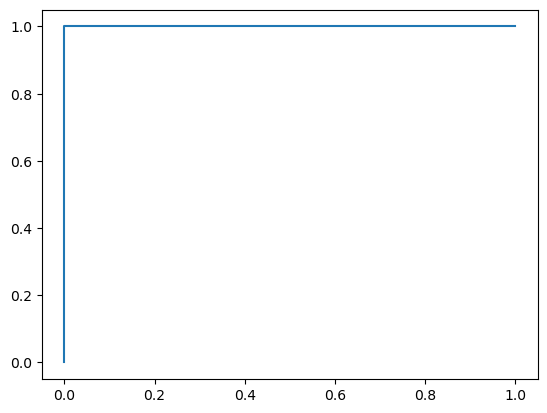

In [14]:

ldata = []
target = []
i = 1
for dat in trainData:
    tempL = l
    tempdat = np.array_split(dat, bestl)
    tempDat = []
    for da in tempdat:
        tempDat = tempDat + [da[1].mean(), da[1].std(), da[1].describe()[6], da[2].mean(), da[2].std(), da[2].describe()[6], da[6].mean(), da[6].std(), da[6].describe()[6]]
#         First 9 instances bending
    if i <= 9:
         ldata.append([1] + tempDat)  
    else:
        ldata.append([0] + tempDat)
    
    i += 1
columns = [str(x) for x in range(0, bestl*9 + 1)]
trainingColumns = [str(x) for x in range(1, bestl*9 + 1)]
trainDF = pd.DataFrame(ldata, columns=columns)


model = LogisticRegressionCV(max_iter=2000, solver='liblinear', penalty='l1', cv=5, Cs=bestc)
model.fit(trainDF[trainingColumns], trainDF['0'])
predictions = model.predict(trainDF[trainingColumns])

print("Coefficients: "+ str(model.coef_))
print("Confusion Matrix")
print(confusion_matrix(trainDF['0'], predictions))
fpr, tpr, thresholds_keras = roc_curve(predictions, trainDF['0'])
plt.plot(fpr,tpr)
aucm = auc(fpr, tpr)
print("auc=", aucm)
print("Accuracy Score:" + str(accuracy_score(trainDF['0'], predictions)))

Coefficients: [[ -0.05217053   1.45625284   0.29017734   6.66392071   0.
    0.           0.           0.           0.           0.94802433
    0.42878483   0.           0.           0.          -5.44138302
    0.           0.          -1.06446942   0.           2.45409678
   -0.56259354   0.           0.           0.           0.
    0.           1.60352517  -0.24185379   2.23327201  -1.02285589
    0.           0.           0.          -2.03586566 -18.82404239
    0.           0.89182784   0.          -0.1510975    0.
    0.           1.40691463   0.          -2.71869555  -1.14581599]]
Confusion Matrix
[[14  1]
 [ 2  2]]
auc =  0.7708333333333333
Accuracy Score:0.8421052631578947


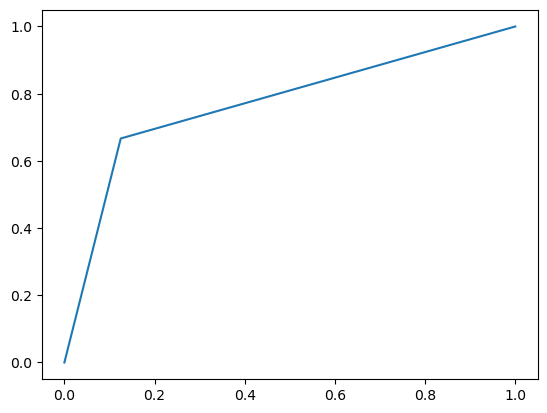

In [15]:

ldata = []
i = 1
for dat in testData:
    tempL = l
    tempdat = np.array_split(dat, bestl)
    tempDat = []
    for da in tempdat:
        tempDat = tempDat + [da[1].mean(), da[1].std(), da[1].describe()[6], da[2].mean(), da[2].std(), da[2].describe()[6], da[6].mean(), da[6].std(), da[6].describe()[6]]
#         First 4 instances bending
    if i <= 4:
         ldata.append([1] + tempDat)  
    else:
        ldata.append([0] + tempDat)
    tdata.append(tempDat)
    i += 1
columns = [str(x) for x in range(0, bestl*9 + 1)]
trainingColumns = [str(x) for x in range(1, bestl*9 + 1)]
trainDF = pd.DataFrame(ldata, columns=columns)

    
# building the model and fitting the data

predictions = model.predict(trainDF[trainingColumns])
print("Coefficients: "+ str(model.coef_))
print("Confusion Matrix")
print(confusion_matrix(trainDF['0'], predictions))
fpr, tpr, thresholds_keras = roc_curve(predictions, trainDF['0'])
plt.plot(fpr,tpr)
aucm = auc(fpr, tpr)
print("auc = ", aucm)
print("Accuracy Score:" + str(accuracy_score(trainDF['0'], predictions)))

###### b.ii). Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

###### L1 performed better than RFECV in this dataset. L1-penalised was easier to implement since the package takes care of the tuning the parameters. Feature selection, I had to worry about the mask to remember the best Fit

##### c)i). Multi-class Classification

In [16]:
l = 1

# prepare the cross-validation procedure
model = LogisticRegressionCV(max_iter=50, solver='liblinear', penalty='l1', cv=5)

bestScore = 0
bestl = 0
bestc = 0
bestFeatures = []
while l < 21:
    print("Processing l = " + str(l))
    ldata = []
    i = 1
    for dat in trainData:
        tempL = l
        tempdat = np.array_split(dat, l)
        tempDat = []
        for da in tempdat:
            tempDat = tempDat + [da[1].mean(), da[1].std(), da[1].describe()[6], da[2].mean(), da[2].std(), da[2].describe()[6], da[6].mean(), da[6].std(), da[6].describe()[6]]
#         First 9 instances bending
        if i <= 9:
            ldata.append([0] + tempDat)
        elif i <= 21:
            ldata.append([1] + tempDat)
        elif i <= 33:
            ldata.append([2] + tempDat)
        elif i <= 45:
            ldata.append([3] + tempDat)
        elif i <= 57:
            ldata.append([4] + tempDat)
        else:
            ldata.append([5] + tempDat)
        i += 1
    columns = [str(x) for x in range(0, l*9 + 1)]
    trainingColumns = [str(x) for x in range(1, l*9 + 1)]
    trainDF = pd.DataFrame(ldata, columns=columns)
    model.fit(trainDF[trainingColumns], trainDF['0'])
#     Excluding target feature 
    currentScore = model.score(trainDF[trainingColumns], trainDF['0'])
    print ("Classifier score is: %s " % currentScore)
    if bestScore < currentScore:
        bestScore = currentScore
        bestl = l
        bestc = model.Cs_
    l+=1

Processing l = 1
Classifier score is: 0.6811594202898551 
Processing l = 2
Classifier score is: 0.9855072463768116 
Processing l = 3
Classifier score is: 1.0 
Processing l = 4
Classifier score is: 1.0 
Processing l = 5
Classifier score is: 1.0 
Processing l = 6
Classifier score is: 1.0 
Processing l = 7
Classifier score is: 1.0 
Processing l = 8
Classifier score is: 0.8260869565217391 
Processing l = 9
Classifier score is: 0.8260869565217391 
Processing l = 10
Classifier score is: 0.9855072463768116 
Processing l = 11
Classifier score is: 0.9855072463768116 
Processing l = 12
Classifier score is: 1.0 
Processing l = 13
Classifier score is: 0.8260869565217391 
Processing l = 14
Classifier score is: 1.0 
Processing l = 15
Classifier score is: 0.8260869565217391 
Processing l = 16
Classifier score is: 1.0 
Processing l = 17
Classifier score is: 0.8260869565217391 
Processing l = 18
Classifier score is: 0.8260869565217391 
Processing l = 19
Classifier score is: 0.8985507246376812 
Processi

Confusion Matrix
[[ 9  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 12]]
Accuracy Score:1.0


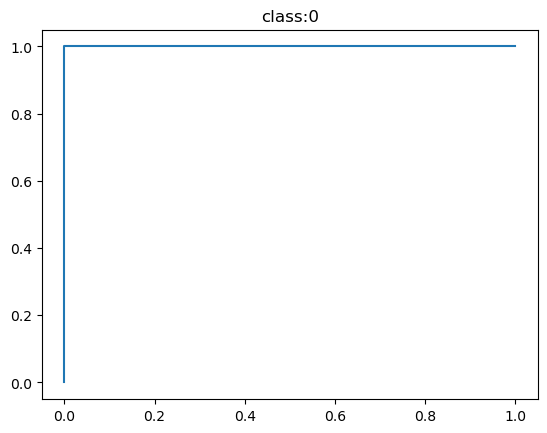

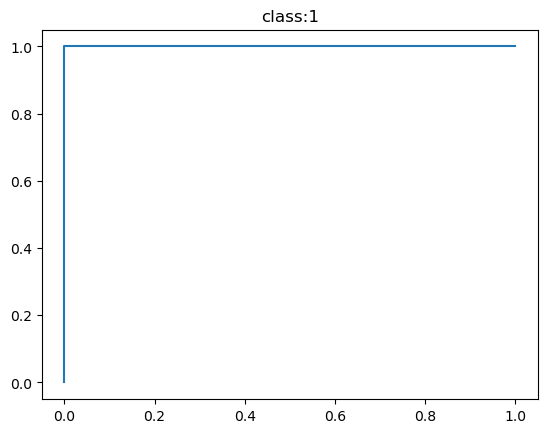

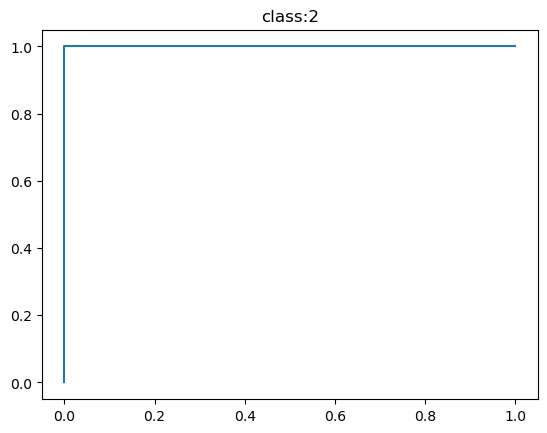

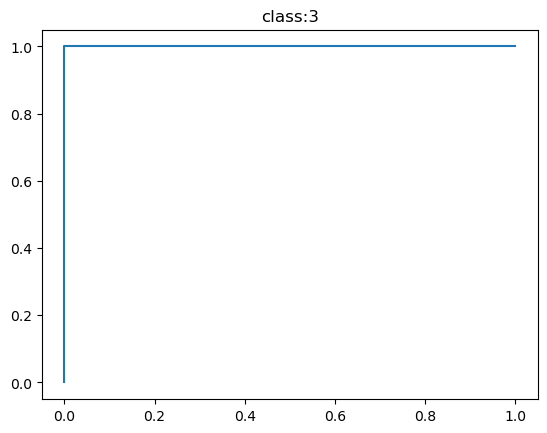

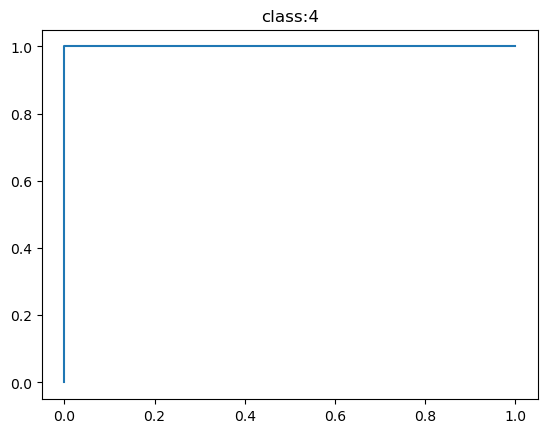

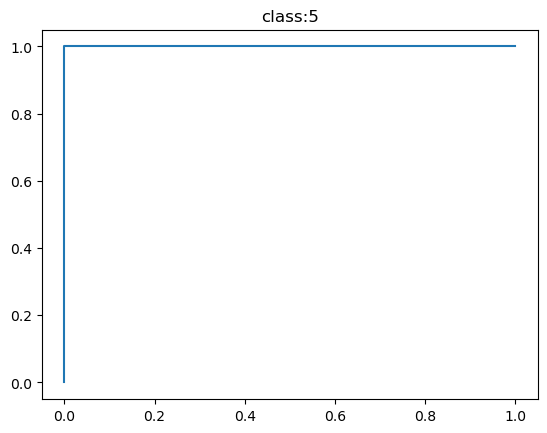

In [17]:

ldata = []
target = []
i = 1
for dat in trainData:
    tempL = l
    tempdat = np.array_split(dat, bestl)
    tempDat = []
    for da in tempdat:
        tempDat = tempDat + [da[1].mean(), da[1].std(), da[1].describe()[6], da[2].mean(), da[2].std(), da[2].describe()[6], da[6].mean(), da[6].std(), da[6].describe()[6]]
#         First 9 instances bending
    if i <= 9:
        ldata.append([0] + tempDat)
    elif i <= 21:
        ldata.append([1] + tempDat)
    elif i <= 33:
        ldata.append([2] + tempDat)
    elif i <= 45:
        ldata.append([3] + tempDat)
    elif i <= 57:
        ldata.append([4] + tempDat)
    else:
        ldata.append([5] + tempDat)
    i += 1
columns = [str(x) for x in range(0, bestl*9 + 1)]
trainingColumns = [str(x) for x in range(1, bestl*9 + 1)]
trainDF = pd.DataFrame(ldata, columns=columns)


model = LogisticRegressionCV(max_iter=50, solver='liblinear', penalty='l1', cv=5, Cs=bestc)
model.fit(trainDF[trainingColumns], trainDF['0'])
predictions = model.predict(trainDF[trainingColumns])
print("Confusion Matrix")
print(confusion_matrix(trainDF['0'], predictions))
print("Accuracy Score:" + str(accuracy_score(trainDF['0'], predictions)))
# ROC for multiclass
for i in range(0, 6):
    newPred = []
    newTarget = []
    for j in range(0,69):
        if predictions[j] == i:
            newPred.append(0)
        else:
            newPred.append(1)
        if trainDF['0'][j] == i:
            newTarget.append(0)
        else:
            newTarget.append(1)
            
    fpr, tpr, thresholds_keras = roc_curve(newPred, newTarget)
    plt.plot(fpr,tpr)
    plt.title("class:" + str(i))
    plt.show()

Confusion Matrix
[[2 0 0 1 1 0]
 [0 2 0 1 0 0]
 [1 0 2 0 0 0]
 [0 0 0 1 2 0]
 [1 0 0 1 1 0]
 [0 0 0 0 0 3]]
Test Error:0.42105263157894735


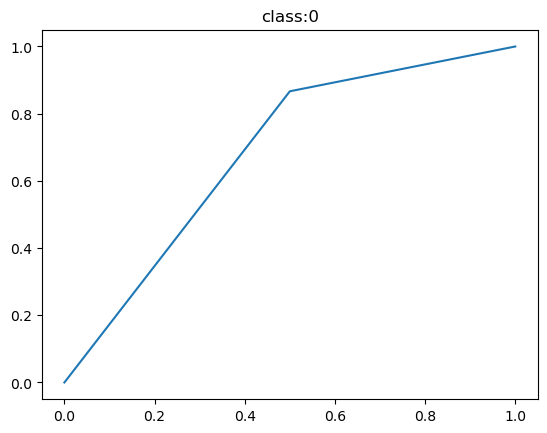

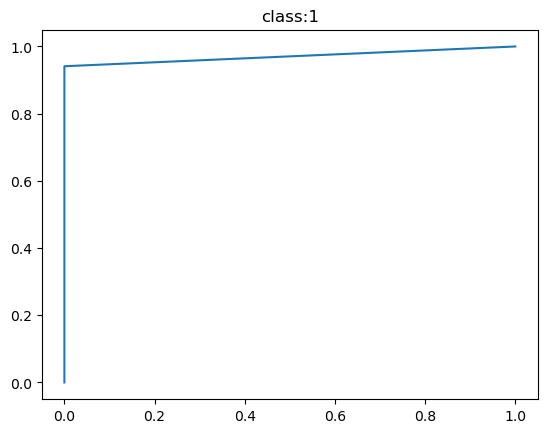

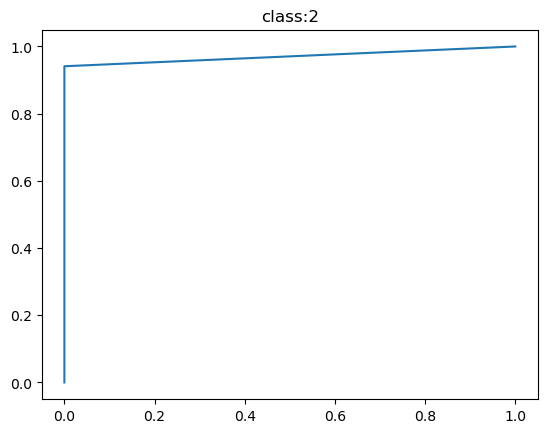

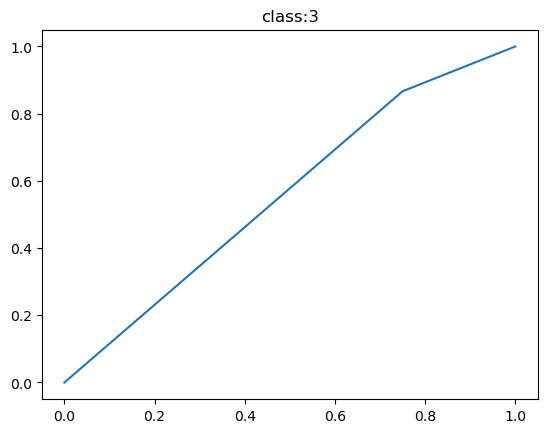

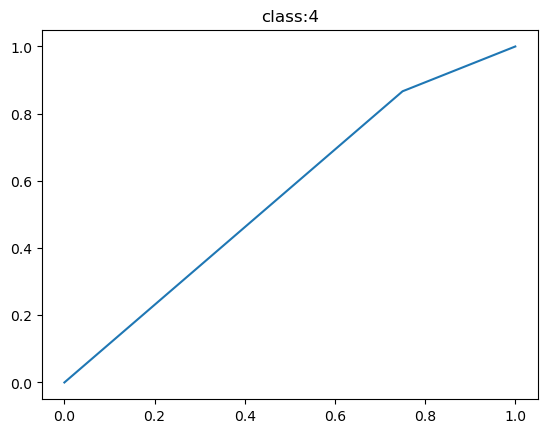

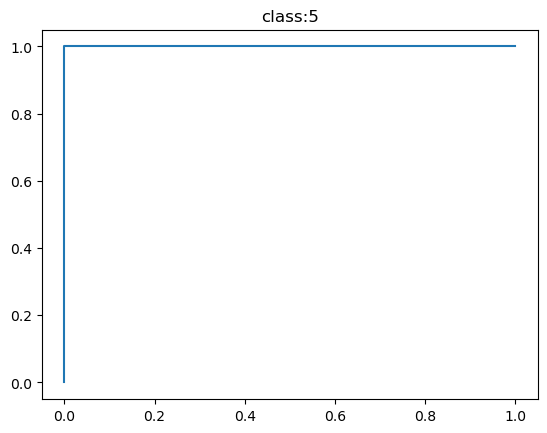

In [18]:

ldata = []
i = 1
for dat in testData:
    tempL = l
    tempdat = np.array_split(dat, bestl)
    tempDat = []
    for da in tempdat:
        tempDat = tempDat + [da[1].mean(), da[1].std(), da[1].describe()[6], da[2].mean(), da[2].std(), da[2].describe()[6], da[6].mean(), da[6].std(), da[6].describe()[6]]
#         First 4 instances bending
    if i <= 4:
        ldata.append([0] + tempDat)
    elif i <= 7:
        ldata.append([1] + tempDat)
    elif i <= 10:
        ldata.append([2] + tempDat)
    elif i <= 13:
        ldata.append([3] + tempDat)
    elif i <= 16:
        ldata.append([4] + tempDat)
    else:
        ldata.append([5] + tempDat)
    i += 1
columns = [str(x) for x in range(0, bestl*9 + 1)]
trainingColumns = [str(x) for x in range(1, bestl*9 + 1)]
trainDF = pd.DataFrame(ldata, columns=columns)

    
# building the model and fitting the data

predictions = model.predict(trainDF[trainingColumns])
print("Confusion Matrix")
print(confusion_matrix(trainDF['0'], predictions))
print("Test Error:" + str(1 - accuracy_score(trainDF['0'], predictions)))
# ROC for multiclass
for i in range(0, 6):
    newPred = []
    newTarget = []
    for j in range(0,19):
        if predictions[j] == i:
            newPred.append(0)
        else:
            newPred.append(1)
        if trainDF['0'][j] == i:
            newTarget.append(0)
        else:
            newTarget.append(1)
            
    fpr, tpr, thresholds_keras = roc_curve(newPred, newTarget)
    plt.plot(fpr,tpr)
    plt.title("class:" + str(i))
    plt.show()

#### c.) ii). Repeat 2(c)i using a Naive Bayes’ classifier. Use both Gaussian and Multinomial priors and compare the results.

In [19]:
l = 1

# prepare the cross-validation procedure
model = GaussianNB()

bestScore = 0
bestl = 0
bestc = 0
bestFeatures = []
while l < 21:
    print("Processing l = " + str(l))
    ldata = []
    i = 1
    for dat in trainData:
        tempL = l
        tempdat = np.array_split(dat, l)
        tempDat = []
        for da in tempdat:
            tempDat = tempDat + [da[1].mean(), da[1].std(), da[1].describe()[6], da[2].mean(), da[2].std(), da[2].describe()[6], da[6].mean(), da[6].std(), da[6].describe()[6]]
#         First 9 instances bending
        if i <= 9:
            ldata.append([0] + tempDat)
        elif i <= 21:
            ldata.append([1] + tempDat)
        elif i <= 33:
            ldata.append([2] + tempDat)
        elif i <= 45:
            ldata.append([3] + tempDat)
        elif i <= 57:
            ldata.append([4] + tempDat)
        else:
            ldata.append([5] + tempDat)
        i += 1
    columns = [str(x) for x in range(0, l*9 + 1)]
    trainingColumns = [str(x) for x in range(1, l*9 + 1)]
    trainDF = pd.DataFrame(ldata, columns=columns)
    model.fit(trainDF[trainingColumns], trainDF['0'])
#     Excluding target feature 
    currentScore = model.score(trainDF[trainingColumns], trainDF['0'])
    print ("Classifier score is: %s " % currentScore)
    if bestScore < currentScore:
        bestScore = currentScore
        bestl = l
    l+=1

Processing l = 1
Classifier score is: 0.8260869565217391 
Processing l = 2
Classifier score is: 0.8985507246376812 
Processing l = 3
Classifier score is: 0.8985507246376812 
Processing l = 4
Classifier score is: 0.8840579710144928 
Processing l = 5
Classifier score is: 0.855072463768116 
Processing l = 6
Classifier score is: 0.8840579710144928 
Processing l = 7
Classifier score is: 0.8985507246376812 
Processing l = 8
Classifier score is: 0.855072463768116 
Processing l = 9
Classifier score is: 0.8840579710144928 
Processing l = 10
Classifier score is: 0.8695652173913043 
Processing l = 11
Classifier score is: 0.927536231884058 
Processing l = 12
Classifier score is: 0.927536231884058 
Processing l = 13
Classifier score is: 0.8985507246376812 
Processing l = 14
Classifier score is: 0.9130434782608695 
Processing l = 15
Classifier score is: 0.9130434782608695 
Processing l = 16
Classifier score is: 0.8985507246376812 
Processing l = 17
Classifier score is: 0.8985507246376812 
Processing

Confusion Matrix
[[ 5  0  1  1  2  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 12]]
Accuracy Score:0.9420289855072463


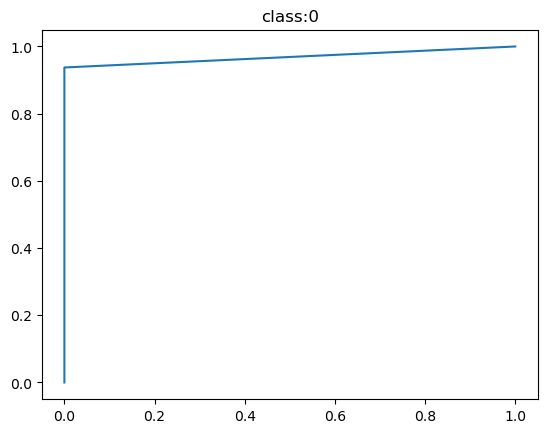

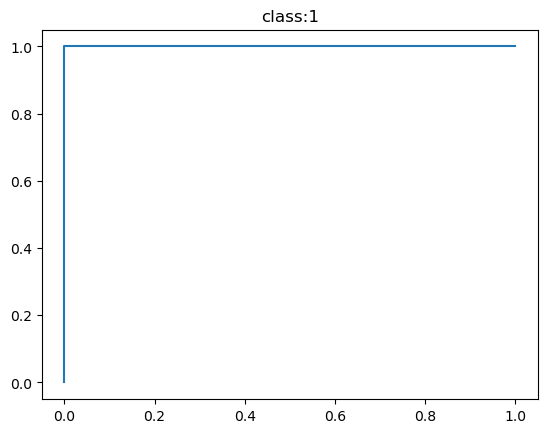

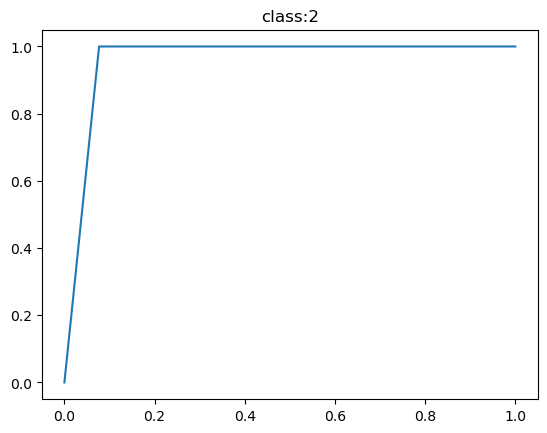

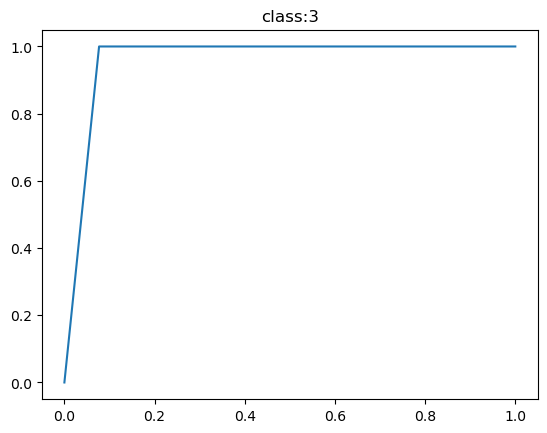

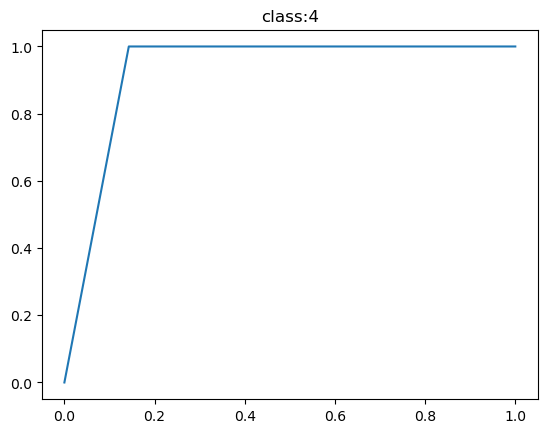

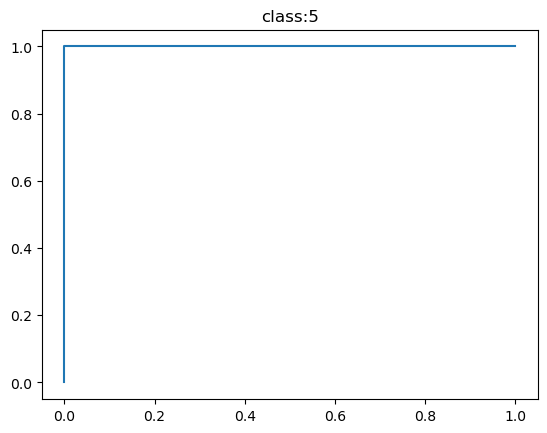

In [20]:

ldata = []
target = []
i = 1
for dat in trainData:
    tempL = l
    tempdat = np.array_split(dat, bestl)
    tempDat = []
    for da in tempdat:
        tempDat = tempDat + [da[1].mean(), da[1].std(), da[1].describe()[6], da[2].mean(), da[2].std(), da[2].describe()[6], da[6].mean(), da[6].std(), da[6].describe()[6]]
#         First 9 instances bending
    if i <= 9:
        ldata.append([0] + tempDat)
    elif i <= 21:
        ldata.append([1] + tempDat)
    elif i <= 33:
        ldata.append([2] + tempDat)
    elif i <= 45:
        ldata.append([3] + tempDat)
    elif i <= 57:
        ldata.append([4] + tempDat)
    else:
        ldata.append([5] + tempDat)
    i += 1
columns = [str(x) for x in range(0, bestl*9 + 1)]
trainingColumns = [str(x) for x in range(1, bestl*9 + 1)]
trainDF = pd.DataFrame(ldata, columns=columns)


model = GaussianNB()
model.fit(trainDF[trainingColumns], trainDF['0'])
predictions = model.predict(trainDF[trainingColumns])
print("Confusion Matrix")
print(confusion_matrix(trainDF['0'], predictions))
print("Accuracy Score:" + str(accuracy_score(trainDF['0'], predictions)))
# ROC for multiclass
for i in range(0, 6):
    newPred = []
    newTarget = []
    for j in range(0,69):
        if predictions[j] == i:
            newPred.append(0)
        else:
            newPred.append(1)
        if trainDF['0'][j] == i:
            newTarget.append(0)
        else:
            newTarget.append(1)
            
    fpr, tpr, thresholds_keras = roc_curve(newPred, newTarget)
    plt.plot(fpr,tpr)
    plt.title("class:" + str(i))
    plt.show()

Confusion Matrix
[[2 0 0 1 1 0]
 [0 3 0 0 0 0]
 [1 0 2 0 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 3]]
Test Error:0.3157894736842105


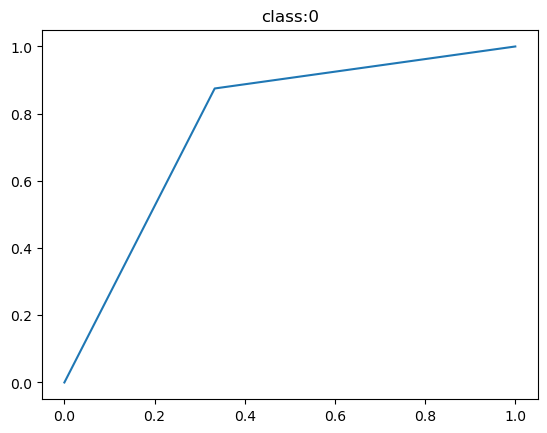

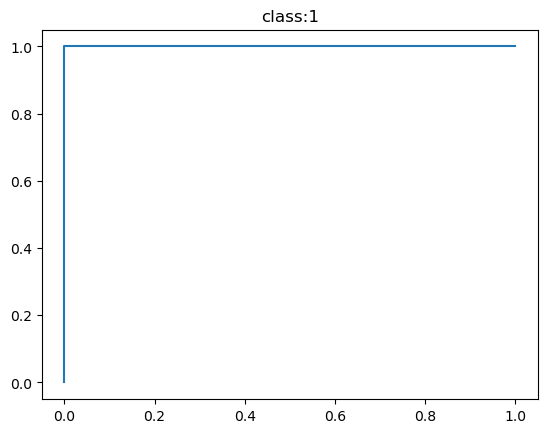

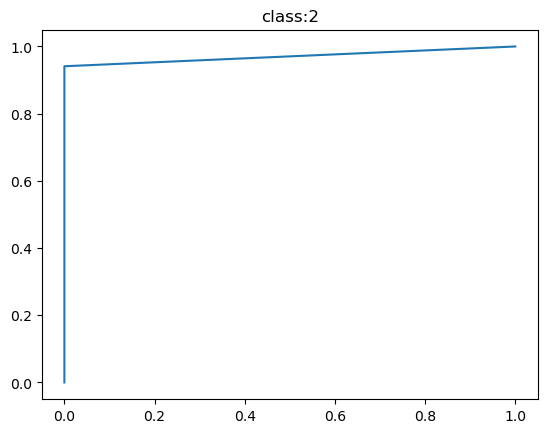

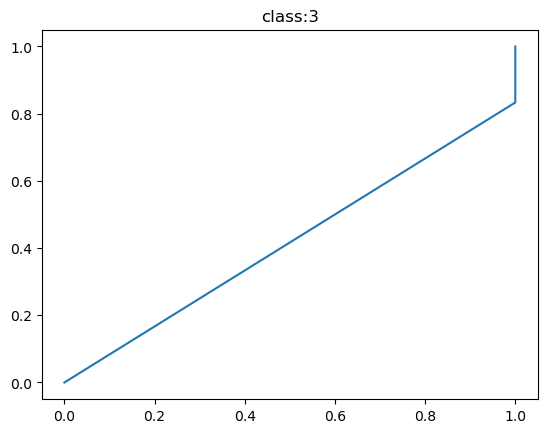

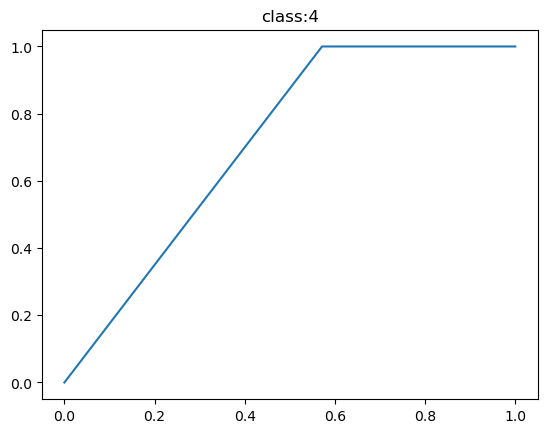

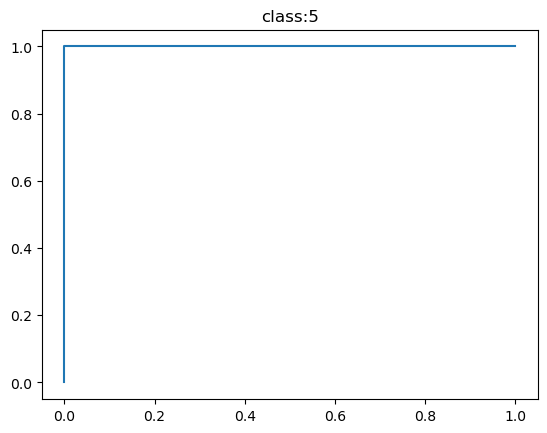

In [21]:

ldata = []
i = 1
for dat in testData:
    tempL = l
    tempdat = np.array_split(dat, bestl)
    tempDat = []
    for da in tempdat:
        tempDat = tempDat + [da[1].mean(), da[1].std(), da[1].describe()[6], da[2].mean(), da[2].std(), da[2].describe()[6], da[6].mean(), da[6].std(), da[6].describe()[6]]
#         First 4 instances bending
    if i <= 4:
        ldata.append([0] + tempDat)
    elif i <= 7:
        ldata.append([1] + tempDat)
    elif i <= 10:
        ldata.append([2] + tempDat)
    elif i <= 13:
        ldata.append([3] + tempDat)
    elif i <= 16:
        ldata.append([4] + tempDat)
    else:
        ldata.append([5] + tempDat)
    i += 1
columns = [str(x) for x in range(0, bestl*9 + 1)]
trainingColumns = [str(x) for x in range(1, bestl*9 + 1)]
trainDF = pd.DataFrame(ldata, columns=columns)

    
# building the model and fitting the data

predictions = model.predict(trainDF[trainingColumns])
print("Confusion Matrix")
print(confusion_matrix(trainDF['0'], predictions))
print("Test Error:" + str(1 - accuracy_score(trainDF['0'], predictions)))
# ROC for multiclass
for i in range(0, 6):
    newPred = []
    newTarget = []
    for j in range(0,19):
        if predictions[j] == i:
            newPred.append(0)
        else:
            newPred.append(1)
        if trainDF['0'][j] == i:
            newTarget.append(0)
        else:
            newTarget.append(1)
            
    fpr, tpr, thresholds_keras = roc_curve(newPred, newTarget)
    plt.plot(fpr,tpr)
    plt.title("class:" + str(i))
    plt.show()

In [22]:
l = 1

# prepare the cross-validation procedure
model = MultinomialNB()


bestScore = 0
bestl = 0
bestc = 0
bestFeatures = []
while l < 21:
    print("Processing l = " + str(l))
    ldata = []
    i = 1
    for dat in trainData:
        tempL = l
        tempdat = np.array_split(dat, l)
        tempDat = []
        for da in tempdat:
            tempDat = tempDat + [da[1].mean(), da[1].std(), da[1].describe()[6], da[2].mean(), da[2].std(), da[2].describe()[6], da[6].mean(), da[6].std(), da[6].describe()[6]]
#         First 9 instances bending
        if i <= 9:
            ldata.append([0] + tempDat)
        elif i <= 21:
            ldata.append([1] + tempDat)
        elif i <= 33:
            ldata.append([2] + tempDat)
        elif i <= 45:
            ldata.append([3] + tempDat)
        elif i <= 57:
            ldata.append([4] + tempDat)
        else:
            ldata.append([5] + tempDat)
        i += 1
    columns = [str(x) for x in range(0, l*9 + 1)]
    trainingColumns = [str(x) for x in range(1, l*9 + 1)]
    trainDF = pd.DataFrame(ldata, columns=columns)
    model.fit(trainDF[trainingColumns], trainDF['0'])
#     Excluding target feature 
    currentScore = model.score(trainDF[trainingColumns], trainDF['0'])
    print ("Classifier score is: %s " % currentScore)
    if bestScore < currentScore:
        bestScore = currentScore
        bestl = l
    l+=1

Processing l = 1
Classifier score is: 0.6231884057971014 
Processing l = 2
Classifier score is: 0.6666666666666666 
Processing l = 3
Classifier score is: 0.6666666666666666 
Processing l = 4
Classifier score is: 0.7101449275362319 
Processing l = 5
Classifier score is: 0.6956521739130435 
Processing l = 6
Classifier score is: 0.7246376811594203 
Processing l = 7
Classifier score is: 0.7246376811594203 
Processing l = 8
Classifier score is: 0.7536231884057971 
Processing l = 9
Classifier score is: 0.7536231884057971 
Processing l = 10
Classifier score is: 0.7681159420289855 
Processing l = 11
Classifier score is: 0.782608695652174 
Processing l = 12
Classifier score is: 0.7391304347826086 
Processing l = 13
Classifier score is: 0.7681159420289855 
Processing l = 14
Classifier score is: 0.782608695652174 
Processing l = 15
Classifier score is: 0.782608695652174 
Processing l = 16
Classifier score is: 0.7971014492753623 
Processing l = 17
Classifier score is: 0.782608695652174 
Processing

Confusion Matrix
[[ 5  0  0  2  2  0]
 [ 0 12  0  0  0  0]
 [ 0  0 10  0  2  0]
 [ 0  0  5  6  1  0]
 [ 0  0  1  0 11  0]
 [ 0  0  0  0  0 12]]
Accuracy Score:0.8115942028985508


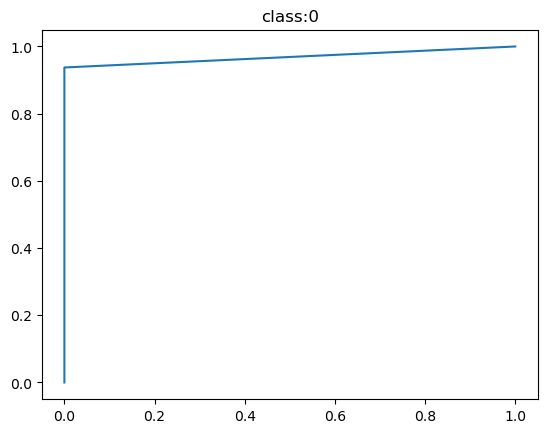

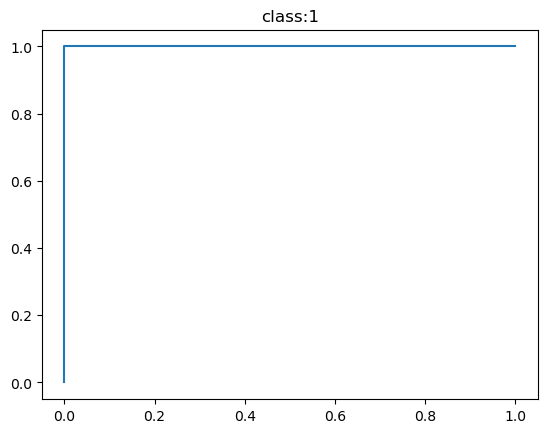

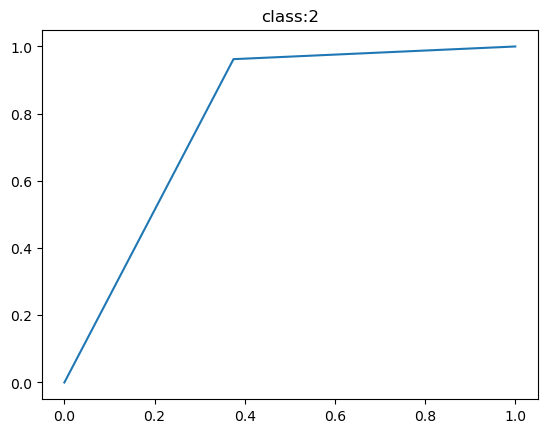

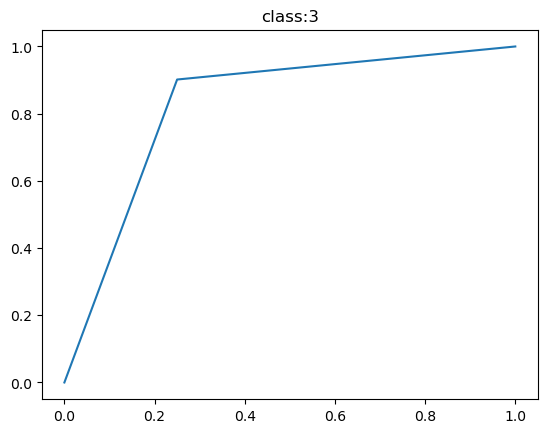

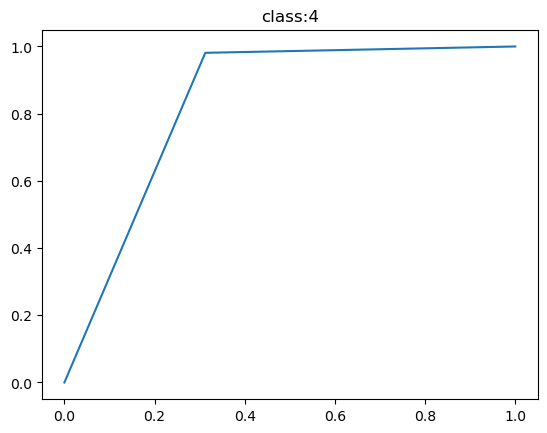

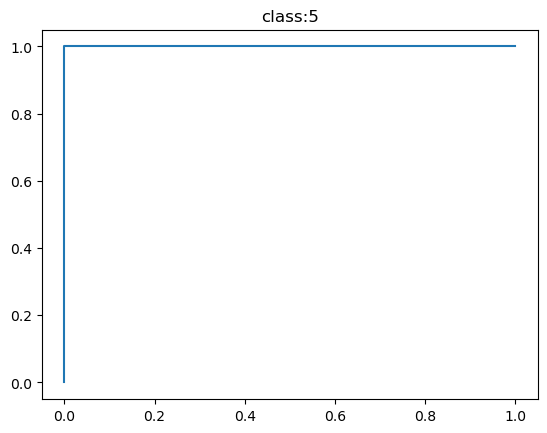

In [23]:

ldata = []
target = []
i = 1
for dat in trainData:
    tempL = l
    tempdat = np.array_split(dat, bestl)
    tempDat = []
    for da in tempdat:
        tempDat = tempDat + [da[1].mean(), da[1].std(), da[1].describe()[6], da[2].mean(), da[2].std(), da[2].describe()[6], da[6].mean(), da[6].std(), da[6].describe()[6]]
#         First 9 instances bending
    if i <= 9:
        ldata.append([0] + tempDat)
    elif i <= 21:
        ldata.append([1] + tempDat)
    elif i <= 33:
        ldata.append([2] + tempDat)
    elif i <= 45:
        ldata.append([3] + tempDat)
    elif i <= 57:
        ldata.append([4] + tempDat)
    else:
        ldata.append([5] + tempDat)
    i += 1
columns = [str(x) for x in range(0, bestl*9 + 1)]
trainingColumns = [str(x) for x in range(1, bestl*9 + 1)]
trainDF = pd.DataFrame(ldata, columns=columns)


model = MultinomialNB()
model.fit(trainDF[trainingColumns], trainDF['0'])
predictions = model.predict(trainDF[trainingColumns])
print("Confusion Matrix")
print(confusion_matrix(trainDF['0'], predictions))
print("Accuracy Score:" + str(accuracy_score(trainDF['0'], predictions)))
# ROC for multiclass
for i in range(0, 6):
    newPred = []
    newTarget = []
    for j in range(0,69):
        if predictions[j] == i:
            newPred.append(0)
        else:
            newPred.append(1)
        if trainDF['0'][j] == i:
            newTarget.append(0)
        else:
            newTarget.append(1)
            
    fpr, tpr, thresholds_keras = roc_curve(newPred, newTarget)
    plt.plot(fpr,tpr)
    plt.title("class:" + str(i))
    plt.show()

Confusion Matrix
[[2 0 2 0 0 0]
 [0 3 0 0 0 0]
 [0 0 2 0 1 0]
 [0 0 1 2 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 3]]
Test Error:0.21052631578947367


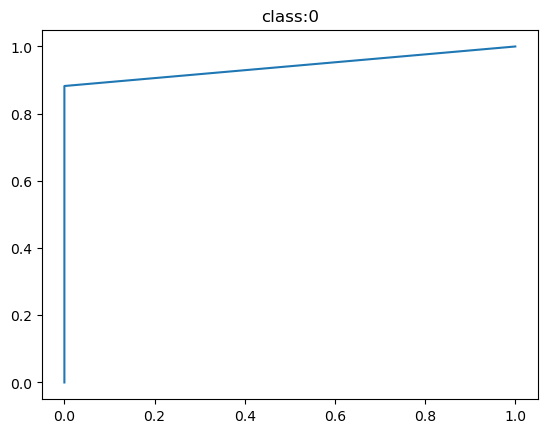

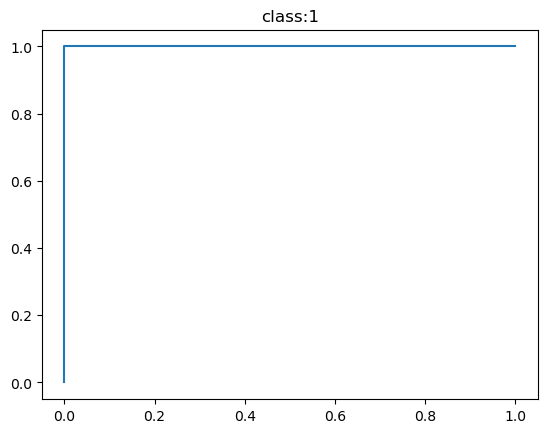

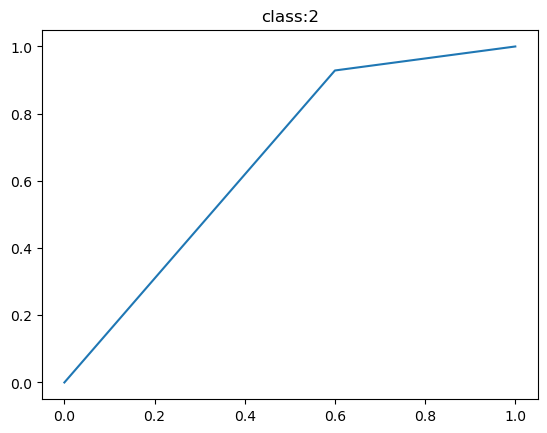

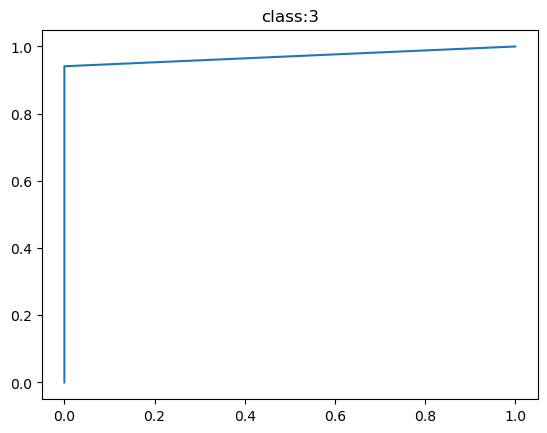

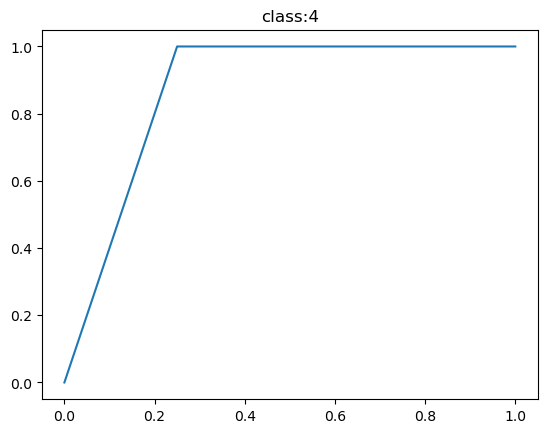

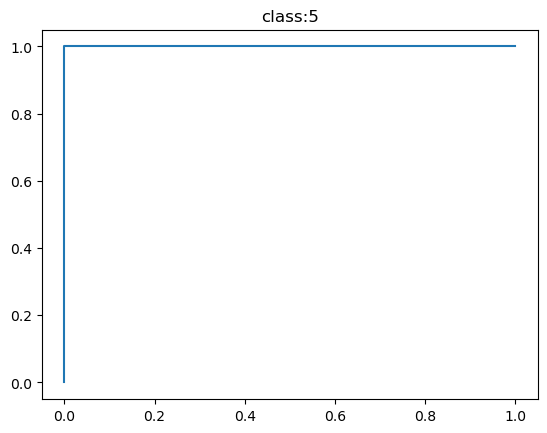

In [24]:

ldata = []
i = 1
for dat in testData:
    tempL = l
    tempdat = np.array_split(dat, bestl)
    tempDat = []
    for da in tempdat:
        tempDat = tempDat + [da[1].mean(), da[1].std(), da[1].describe()[6], da[2].mean(), da[2].std(), da[2].describe()[6], da[6].mean(), da[6].std(), da[6].describe()[6]]
#         First 4 instances bending
    if i <= 4:
        ldata.append([0] + tempDat)
    elif i <= 7:
        ldata.append([1] + tempDat)
    elif i <= 10:
        ldata.append([2] + tempDat)
    elif i <= 13:
        ldata.append([3] + tempDat)
    elif i <= 16:
        ldata.append([4] + tempDat)
    else:
        ldata.append([5] + tempDat)
    i += 1
columns = [str(x) for x in range(0, bestl*9 + 1)]
trainingColumns = [str(x) for x in range(1, bestl*9 + 1)]
trainDF = pd.DataFrame(ldata, columns=columns)

    
# building the model and fitting the data

predictions = model.predict(trainDF[trainingColumns])
print("Confusion Matrix")
print(confusion_matrix(trainDF['0'], predictions))
print("Test Error:" + str(1 - accuracy_score(trainDF['0'], predictions)))
# ROC for multiclass
for i in range(0, 6):
    newPred = []
    newTarget = []
    for j in range(0,19):
        if predictions[j] == i:
            newPred.append(0)
        else:
            newPred.append(1)
        if trainDF['0'][j] == i:
            newTarget.append(0)
        else:
            newTarget.append(1)
            
    fpr, tpr, thresholds_keras = roc_curve(newPred, newTarget)
    plt.plot(fpr,tpr)
    plt.title("class:" + str(i))
    plt.show()

#### MultinomialNB has the lowest test error of all my models in multinomial scenario